# Outlines for the Telecom Churn - Group Case Study::
* [1.Problem Statement and Business Goal](#1)
* [2. Reading and Unerstanding the data](#2)
* [3. Data Cleaning](#3)
* [4. Exploratory Data Analysis](#4)
* [5. Data Preparation](#5)
* [6. Modelling](#6)
* [7. Recommendations](#7)

## 1.Problem Statement and Business Goal <a id="1"></a>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another.Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, `customer retention` has now become even more important than `customer acquisition`.<br> 
For many incumbent operators, retaining high profitable customers is the number one business goal.<br>
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.<br>
In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.<br>
The `business objective` is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## 2. Reading and Understanding the data<a id="2"></a>

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Reading the data
data= pd.read_csv("telecom_churn_data.csv")
data.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362

In [3]:
data.shape

(99999, 226)

In [4]:
#statistical description of the various attributes
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


## 3. Data Cleaning<a id="3"></a>

###  Looking for columns which are highly skewed.

In [5]:
#List of columns with only 1 unqiue value
col_list = data.loc[:,data.apply(pd.Series.nunique) == 1]
col_list.head(2)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
col_list.shape

(99999, 16)

In [7]:
col_list_cols= list(col_list.columns)
print(col_list_cols)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [8]:
#Dropping such 16 columns where only one value is there
data.drop(col_list_cols, axis=1, inplace= True)

In [9]:
#inspecting shape after dropping
data.shape

(99999, 210)

In [10]:
date_cols=  list()
for i in list(data.columns):
    if 'date' in i:    #contains the string fb
        date_cols.append(i)
print(date_cols)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [11]:
len(date_cols)

8

In [12]:
#dropping the date_cols 
data.drop(date_cols, axis=1, inplace=True)
data.shape

(99999, 202)

In [13]:
#removing identifier mobile_number
data.drop("mobile_number", axis=1, inplace=True)
data.shape

(99999, 201)

### looking  at the missing data values<a id="3.2"></a>

In [14]:
#missing data 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
high_missing_data =missing_data[missing_data.Percent > 70]
high_missing_data.sort_values('Percent', ascending=False)
high_missing_data.head(5)

,Total,Percent
night_pck_user_6,74846,74.846748
total_rech_data_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
count_rech_2g_6,74846,74.846748
arpu_2g_6,74846,74.846748


In [15]:
cols_high_missing= list(high_missing_data.index)
print(cols_high_missing) 

['night_pck_user_6', 'total_rech_data_6', 'av_rech_amt_data_6', 'count_rech_2g_6', 'arpu_2g_6', 'fb_user_6', 'count_rech_3g_6', 'arpu_3g_6', 'max_rech_data_6', 'night_pck_user_7', 'arpu_2g_7', 'max_rech_data_7', 'count_rech_2g_7', 'arpu_3g_7', 'fb_user_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'total_rech_data_7', 'arpu_2g_9', 'arpu_3g_9', 'total_rech_data_9', 'max_rech_data_9', 'fb_user_9', 'av_rech_amt_data_9', 'count_rech_3g_9', 'count_rech_2g_9', 'night_pck_user_9', 'arpu_3g_8', 'arpu_2g_8', 'count_rech_3g_8', 'night_pck_user_8', 'count_rech_2g_8', 'max_rech_data_8', 'total_rech_data_8', 'fb_user_8', 'av_rech_amt_data_8']


In [16]:
len(cols_high_missing) #there are 36 columns with more than 70%missing data

36

In [17]:
arpu_cols=  list()
for i in cols_high_missing:
    if 'arpu' in i:    #contains the string arpu
        arpu_cols.append(i)
print(arpu_cols)

['arpu_2g_6', 'arpu_3g_6', 'arpu_2g_7', 'arpu_3g_7', 'arpu_2g_9', 'arpu_3g_9', 'arpu_3g_8', 'arpu_2g_8']


arpu means average revenue per user. Although we have 2G/3G volume usage based data available, we can drop these columns.

In [18]:
data.drop(arpu_cols, axis=1,inplace=True)

In [19]:
count_cols=  list()
for i in cols_high_missing:
    if 'count_rech' in i:    #contains the string fb
        count_cols.append(i)
print(count_cols)

['count_rech_2g_6', 'count_rech_3g_6', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_3g_9', 'count_rech_2g_9', 'count_rech_3g_8', 'count_rech_2g_8']


In [20]:
#dropping count cols as they are highly biased (even if try to impute)
data.drop(count_cols, axis=1,inplace=True)

In [21]:
night_pack_cols=  list()
for i in cols_high_missing:
    if 'night' in i:    #contains the string count
        night_pack_cols.append(i)
print(night_pack_cols)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_9', 'night_pck_user_8']


In [22]:
for i in night_pack_cols:
    print(100*data[i].value_counts(dropna=False, normalize=True))
    print("*"*50)

NaN    74.846748
0.0    24.522245
1.0     0.631006
Name: night_pck_user_6, dtype: float64
**************************************************
NaN    74.428744
0.0    24.982250
1.0     0.589006
Name: night_pck_user_7, dtype: float64
**************************************************
NaN    74.077741
0.0    25.508255
1.0     0.414004
Name: night_pck_user_9, dtype: float64
**************************************************
NaN    73.660737
0.0    25.790258
1.0     0.549005
Name: night_pck_user_8, dtype: float64
**************************************************


night abbrevaites for Scheme to use during specific night hours only
pack means Prepaid service schemes called - PACKS
If Null it means the service had not been availed. It means can be substituted for 0.<br> Once such substitution is done, we will get high percentage of 0 value. Then, dropping these columns.

In [23]:
data.drop(night_pack_cols, axis=1, inplace=True)
data.shape

(99999, 181)

In [24]:
max_cols=  list()
for i in cols_high_missing:
    if 'max' in i:    #contains the string max
        max_cols.append(i)
print(max_cols)

['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_9', 'max_rech_data_8']


In [25]:
#dropping the max cols as the information can be conveyed from other features 
data.drop(max_cols, axis=1, inplace=True)

In [26]:
total_rech_cols = list()
for i in cols_high_missing:
    if 'total_rech' in i:    #contains the string fb
        total_rech_cols.append(i)
print(total_rech_cols)

['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_9', 'total_rech_data_8']


In [27]:
#total_rech data related info has high nulls , dropping as this info can be collected from other cols as well
data.drop(total_rech_cols, axis=1, inplace=True)

In [28]:
av_rech_cols= list()
for i in cols_high_missing:
    if 'av_rech' in i:    #contains the string av_rech
        av_rech_cols.append(i)
print(av_rech_cols)

['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_9', 'av_rech_amt_data_8']


In [29]:
data.drop(av_rech_cols, axis=1, inplace=True)

In [30]:
fb_user_cols= list()
for i in cols_high_missing:
    if 'fb' in i:    #contains the string fb
        fb_user_cols.append(i)
print(fb_user_cols)

['fb_user_6', 'fb_user_7', 'fb_user_9', 'fb_user_8']


In [31]:
#filling Nans of all fb_user_cols  by 0, as not taken service value
for i in fb_user_cols:
    data[i].fillna('0', inplace=True) 

In [32]:
#missing data 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data =missing_data[missing_data.Percent > 0]
missing_data.sort_values('Percent', ascending=False)
missing_data.head()

,Total,Percent
loc_og_t2f_mou_9,7745,7.745077
loc_ic_mou_9,7745,7.745077
loc_og_t2t_mou_9,7745,7.745077
loc_og_t2m_mou_9,7745,7.745077
loc_ic_t2m_mou_9,7745,7.745077


In [33]:
missing_data.shape

(108, 2)

###  Filtering high value customers

We need to predict churn only for the high-value customers.<br> Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). After filtering the high-value customers, you should get about 29.9k rows.

In [34]:
#total_rech_amt_6 , total_rech_amt_7 
data['total_avg_rech_GPhase'] = (data.total_rech_amt_6 + data.total_rech_amt_7)/2

In [35]:
data['total_avg_rech_GPhase'].describe(percentiles= [0.7, 0.95, 0.99])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
50%        229.000000
70%        368.500000
95%        937.500000
99%       1590.000000
max      37762.500000
Name: total_avg_rech_GPhase, dtype: float64

In [36]:
# creating a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = data.total_avg_rech_GPhase.quantile(0.7)
print('70th percentile of 6th and 7th months avg recharge amount:: ',high_value_filter)

data_high_value = data[data.total_avg_rech_GPhase >= high_value_filter]
data_high_value.shape

70th percentile of 6th and 7th months avg recharge amount::  368.5


(30011, 170)

In [37]:
# Let's delete the observations with negative arpu values. 

data_high_value = data_high_value[(data_high_value['arpu_6'] >= 0) & 
                            (data_high_value['arpu_7'] >= 0) & 
                            (data_high_value['arpu_8'] >= 0)]

data_high_value.shape

(29862, 170)

### Tag churners and remove attributes of the churn phase
Tagging the curned customers based on the 4th month.<br>
`Crietreia used`: 
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9<br>
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [38]:
# Initially set all the values as 0
data_high_value['Churn']= 0

#is_churned boolean flag for customers where above values are zero
is_churned = (data_high_value.total_ic_mou_9 == 0) & (data_high_value.total_og_mou_9 == 0) & (data_high_value.vol_2g_mb_9 ==0) &(data_high_value.vol_3g_mb_9 ==0)
# set all which having is_churned True condition as 1
data_high_value.loc[is_churned,'Churn']=1

# attributes containing '_9'
columns_9 =  data_high_value.columns[data_high_value.columns.str.contains('_9')]
#print(columns_9)

# drop all columns corresponding to the churn phase
data_high_value.drop(columns_9,axis=1,inplace=True)


In [39]:
#sep_vbc is also a 9th month related column
data_high_value.drop("sep_vbc_3g", axis=1, inplace=True)

In [40]:
#inspecting the shape
data_high_value.shape

(29862, 129)

In [41]:
#missing data 
total = data_high_value.isnull().sum().sort_values(ascending=False)
percent = (data_high_value.isnull().sum()/data_high_value.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data =missing_data[missing_data.Percent > 0]
missing_data.sort_values('Percent', ascending=False)
missing_data.head()

,Total,Percent
loc_og_mou_8,875,2.930145
roam_og_mou_8,875,2.930145
loc_ic_t2m_mou_8,875,2.930145
std_og_t2t_mou_8,875,2.930145
ic_others_8,875,2.930145


In [42]:
missing_data.shape

(81, 2)

#### Using KNNImputer to fill the Null values

In [43]:
from sklearn.impute import KNNImputer
knn= KNNImputer()
data_clean=pd.DataFrame(knn.fit_transform(data_high_value), columns= data_high_value.columns)

In [44]:
data_clean.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_avg_rech_GPhase,Churn
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1185.0,1.0
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,519.0,0.0
2,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6.0,4.0,11.0,507.0,253.0,717.0,110.0,110.0,130.0,110.0,50.0,0.0,0.0,0.0,0.02,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2607.0,0.00,0.00,0

## 4. Exploratory Data Analysis<a id="4"></a>

In [45]:
# let us check what's the % of churned customers
100*data_clean.Churn.sum()/len(data_high_value)

8.442167302926796

Text(0.5, 1.0, 'Churn Distribution')

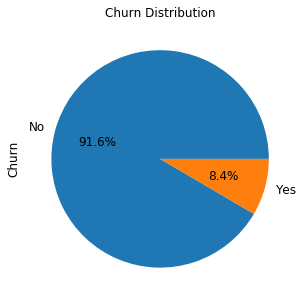

In [46]:
#Churn Distribution
ax = (data_clean['Churn'].value_counts()*100.0 /len(data_clean)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)


We have 91% of the customers who do not churn. Clearly the data is skewed, as we would large proportion of the customers actually donot churn. <br>
This is an important consideration as we will get a lot of false negatives. 

#### Reduce the No of Columns by Creating New Meaningful Features <br>
Creating Columns with Average of 6th & 7th Month Since it's a "Good" Phase and Keep the 8th month untouched as it's "Action" Phase, for now to see if it can give any additional insight

In [47]:
data_clean['vbc_3g_6'] =data_clean.jun_vbc_3g 
data_clean['vbc_3g_7'] =data_clean.jul_vbc_3g 
data_clean['vbc_3g_8'] =data_clean.aug_vbc_3g 
data_clean.drop(['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g'], axis=1, inplace=True)

In [48]:
#creating a new column fb_user67 which depicts whether the service has been availed during the Good Phase or not
data_clean.fb_user_6 = data_clean.fb_user_6.astype('bool')
data_clean.fb_user_7 = data_clean.fb_user_7.astype('bool')

data_clean['fb_user67']=  data_clean.fb_user_6 | data_clean.fb_user_7
data_clean.fb_user67 = data_clean.fb_user67.astype('int')

data_clean.fb_user67.head(2)

0    0
1    1
Name: fb_user67, dtype: int32

In [49]:
#Droopping the fb_user_6 and fb_user_7 columns as we already have these columns
data_clean.drop(['fb_user_6', 'fb_user_7'], axis=1, inplace=True)

In [50]:
col_list = data_clean.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt',
       'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g', 'monthly_3g',
       'sachet_3g', 'vbc_3g'],
      dtype='object')

In [51]:
#creating good phase columns, by taking the average of the corresponding cols during 6th and 7th months
for i, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    data_clean[avg_col_name] = (data_clean[col_6]  + data_clean[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
loc_ic_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
std_ic_mou
total_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g


In [52]:
#making a list of columns of 6th and 7th months
columns_6_7 =  data_clean.columns[data_clean.columns.str.contains('_6|_7')]

In [53]:
columns_6_7

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6',
       'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6',
       'og_others_7', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
      

In [54]:
#dropping the columns of the 6th and 7th months as we have derived new columns from those
data_clean.drop(columns_6_7, axis=1, inplace=True)

In [55]:
#Convert AON in Months
data_clean['aon_mon'] = data_clean['aon']/30
data_clean.drop('aon', axis=1, inplace=True)
data_clean['aon_mon'].head()

0    26.733333
1    10.500000
2    86.900000
3    17.033333
4    22.233333
Name: aon_mon, dtype: float64

In [56]:
#these are highly biased columns 
data_clean.drop(['og_others_8', 'monthly_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'avg_sachet_3g_av67'], axis=1, inplace=True)

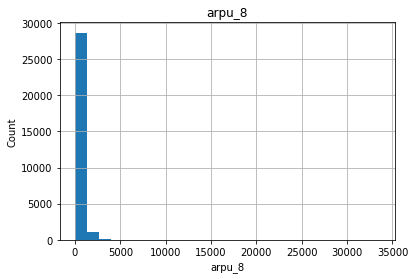

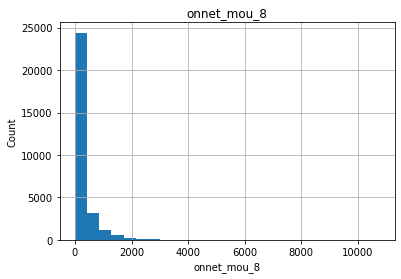

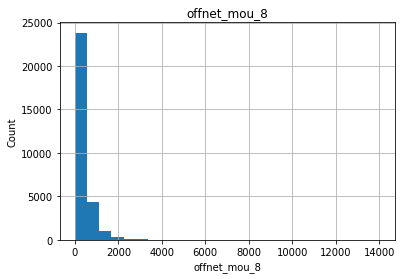

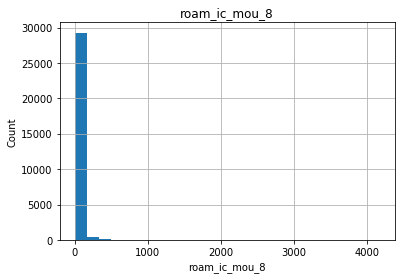

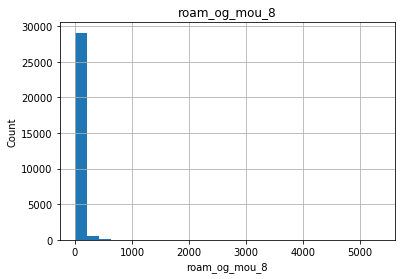

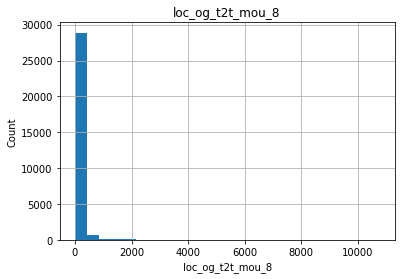

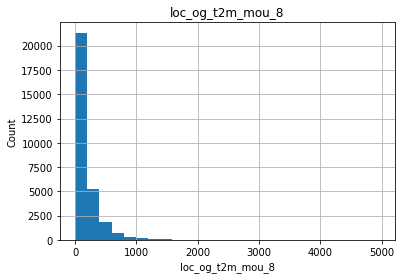

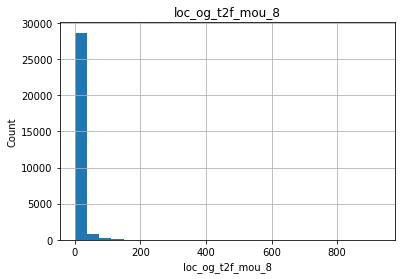

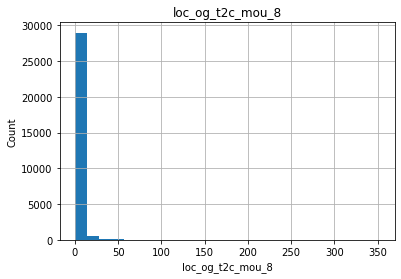

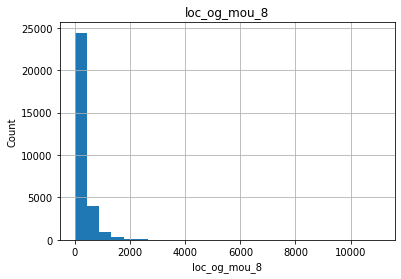

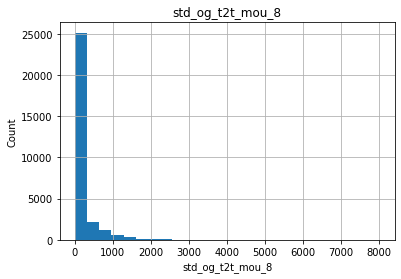

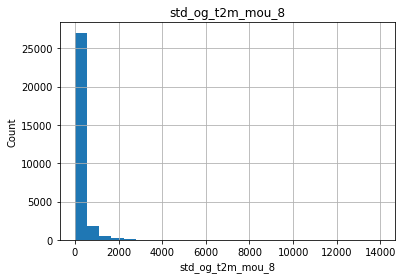

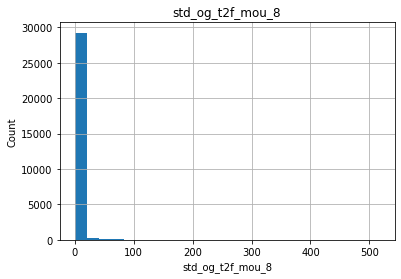

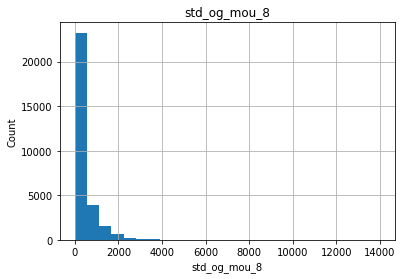

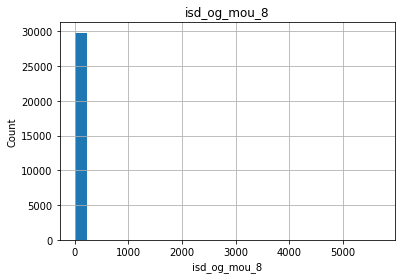

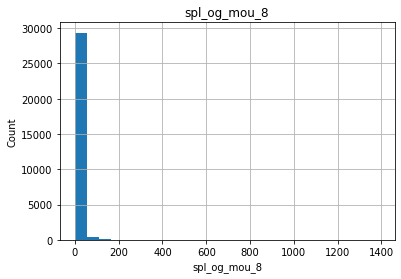

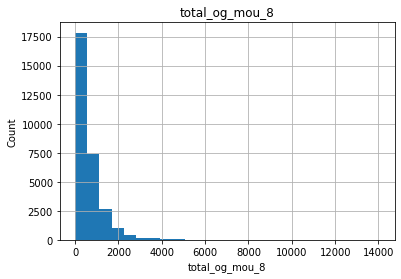

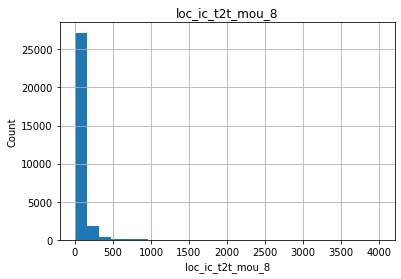

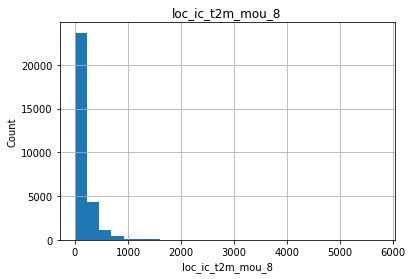

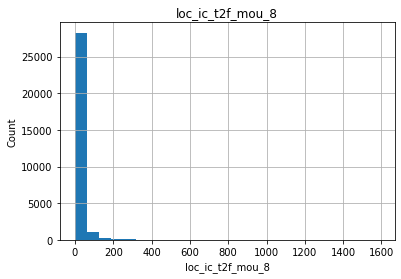

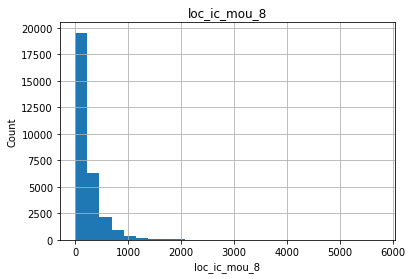

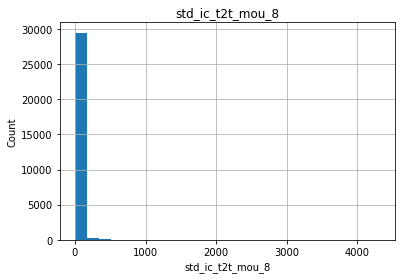

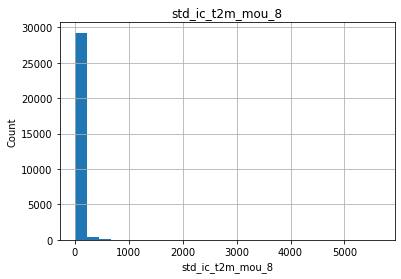

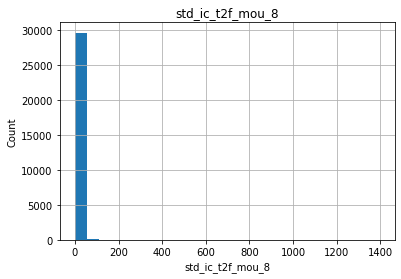

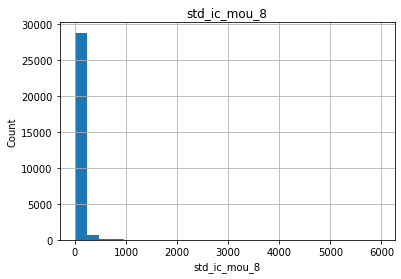

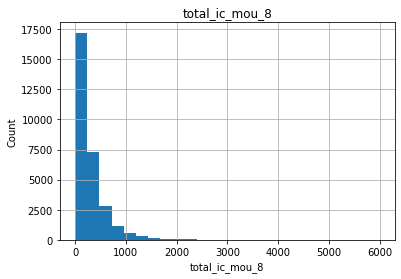

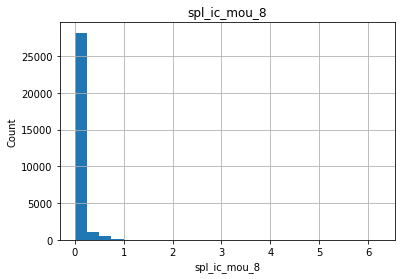

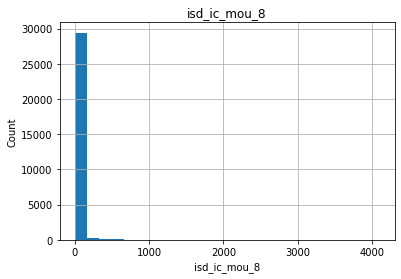

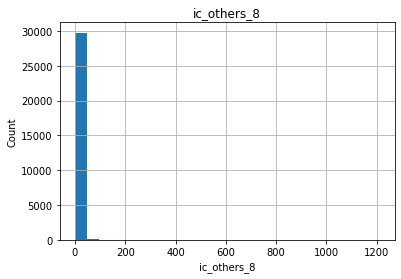

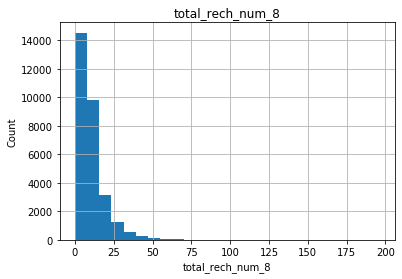

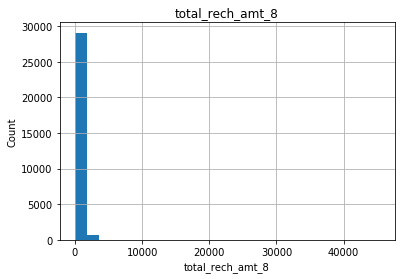

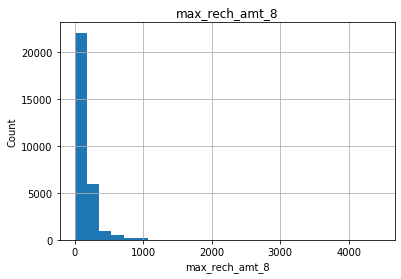

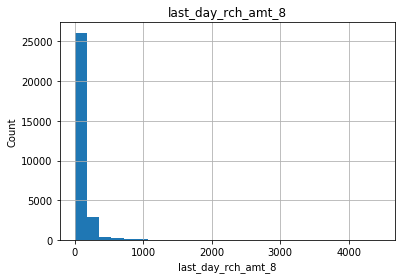

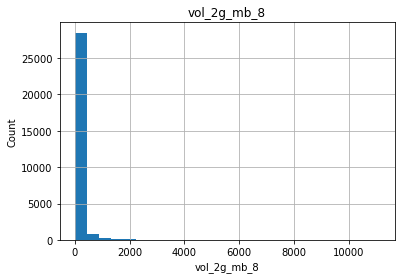

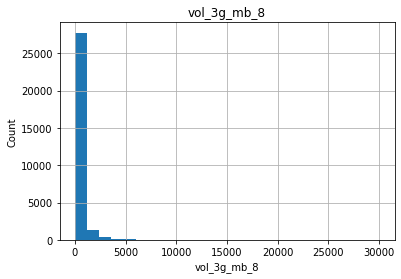

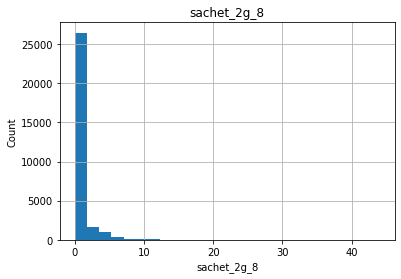

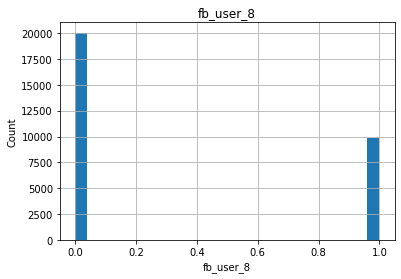

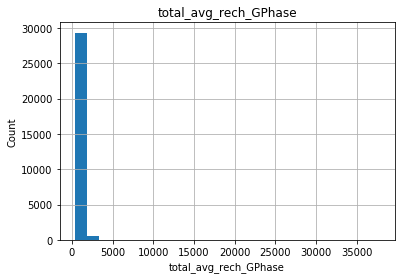

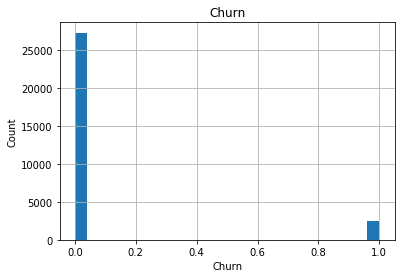

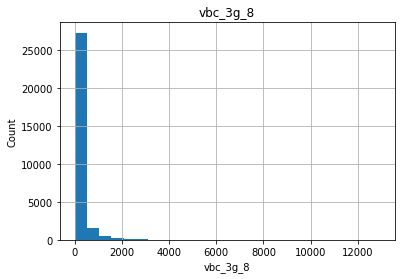

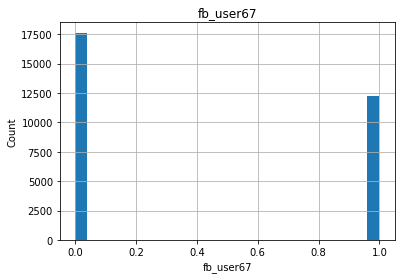

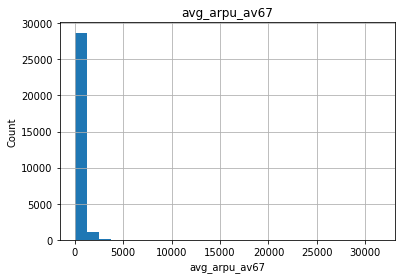

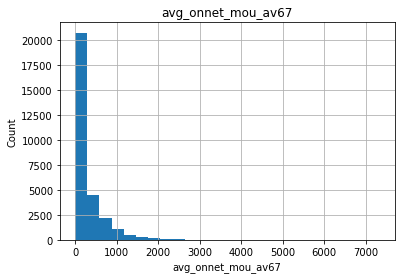

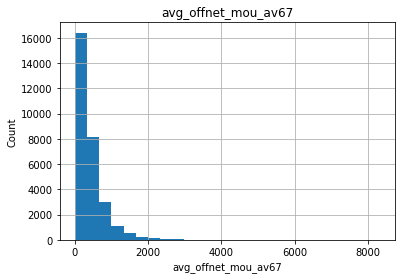

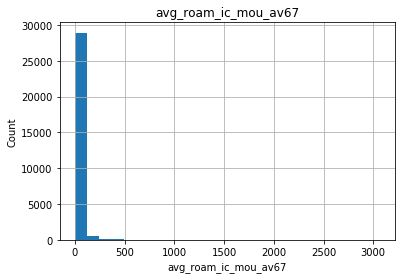

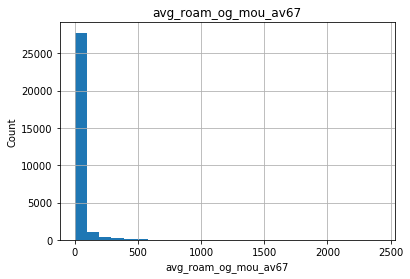

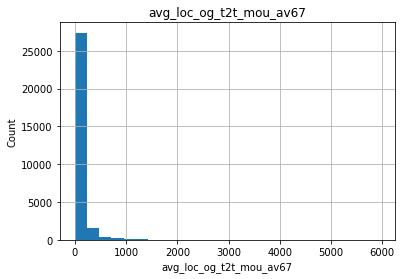

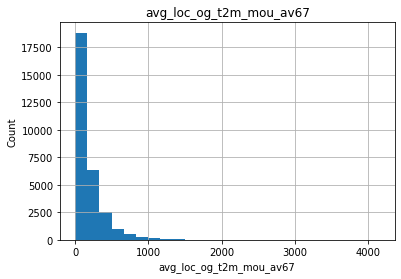

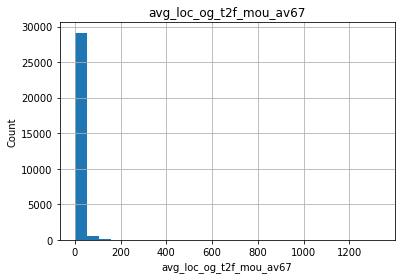

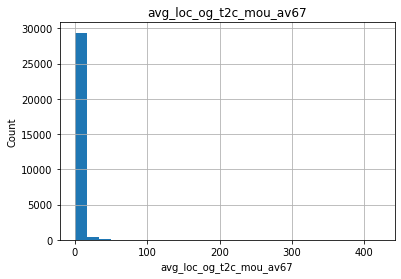

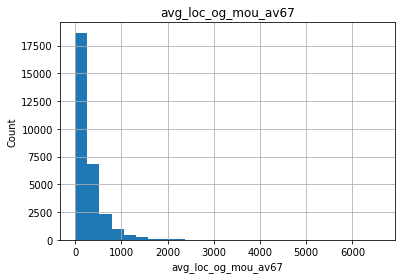

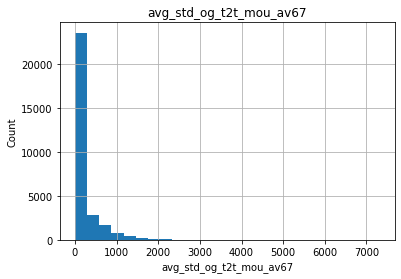

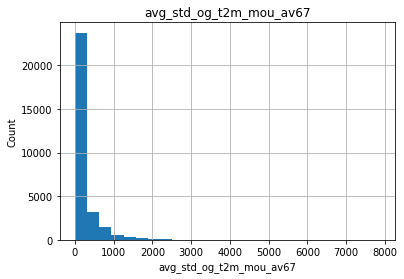

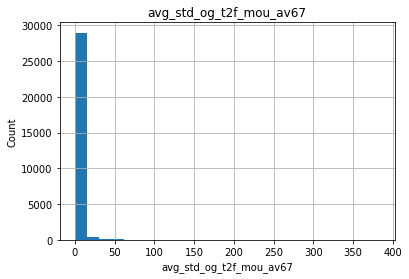

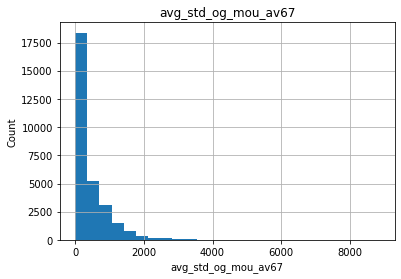

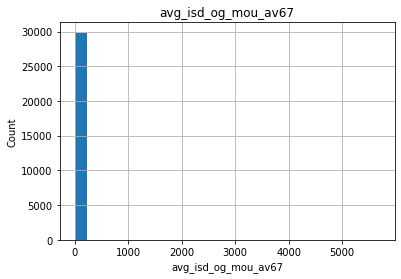

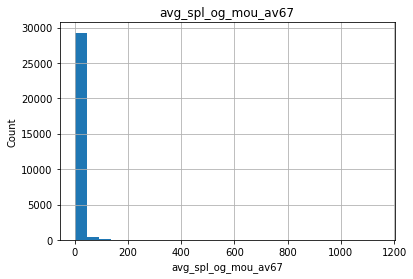

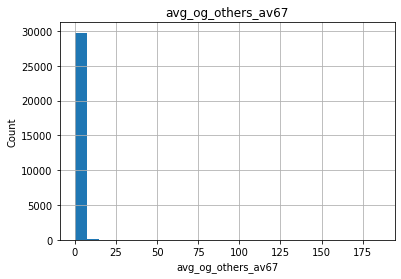

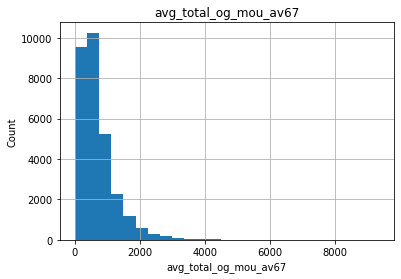

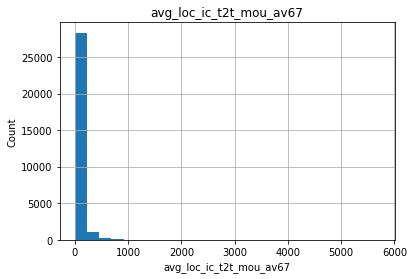

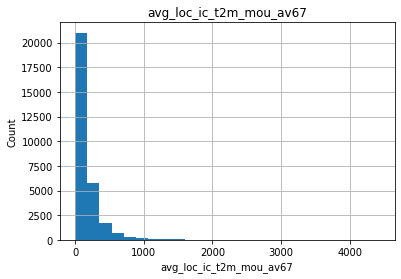

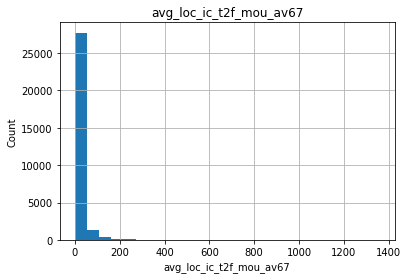

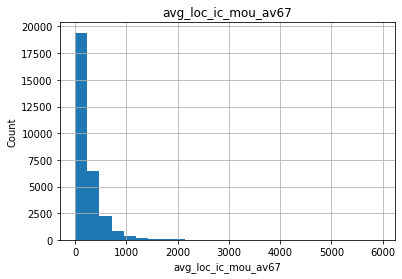

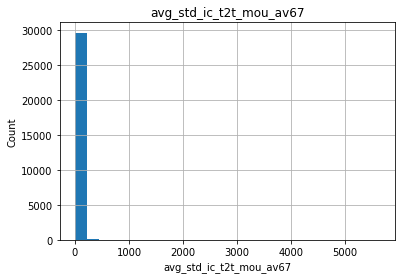

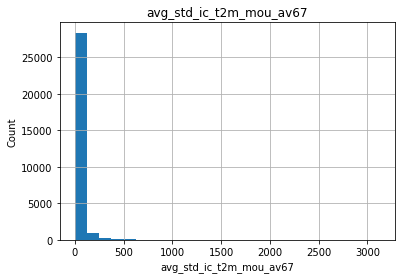

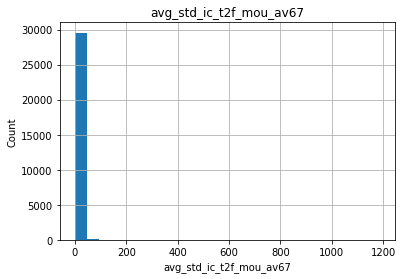

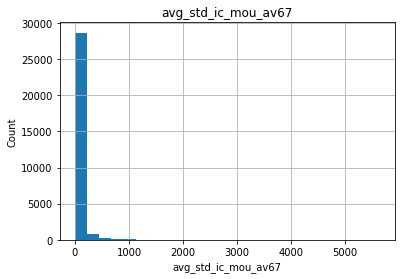

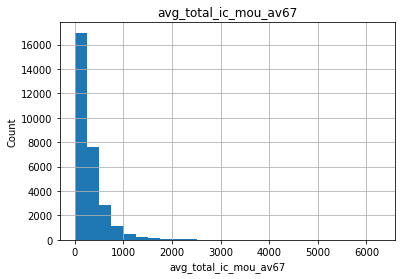

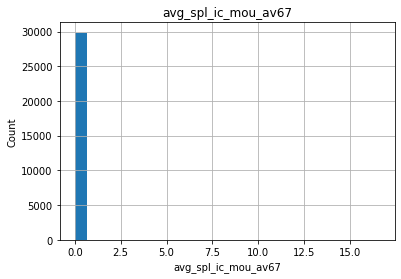

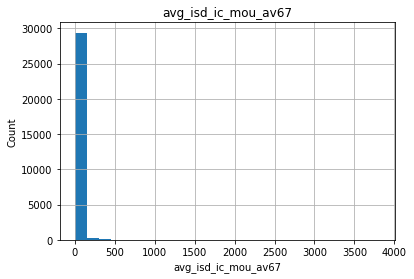

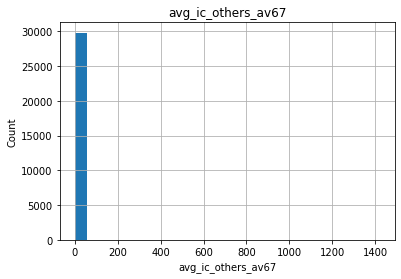

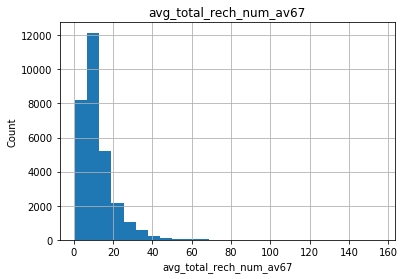

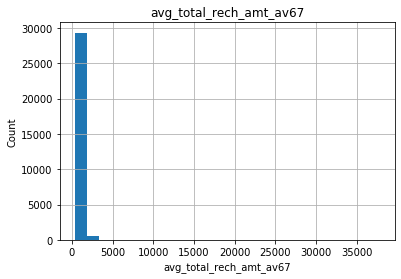

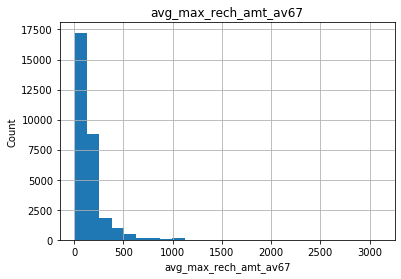

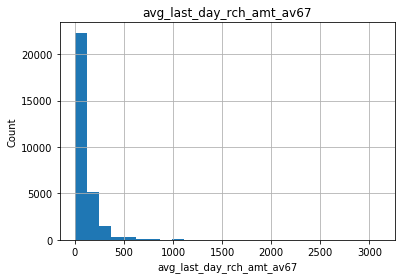

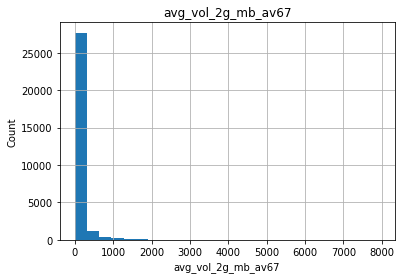

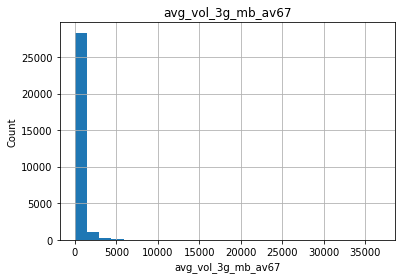

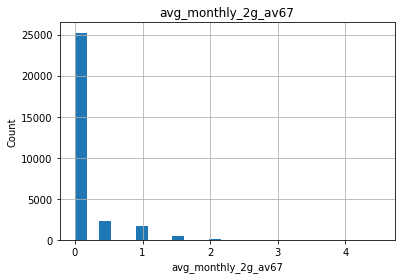

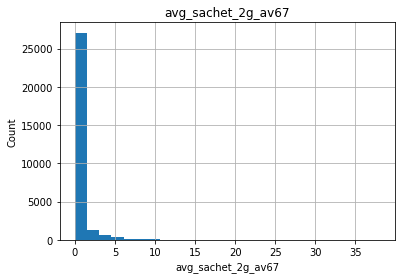

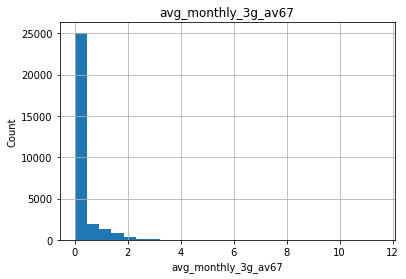

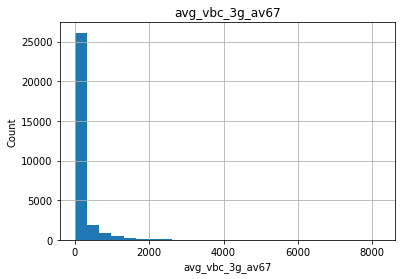

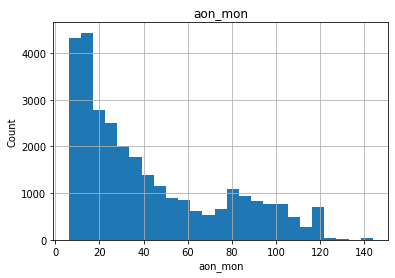

In [57]:
conti_vars= list(data_clean.columns)
for feature in conti_vars:
    data=data_clean.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()  

In [58]:
data_t0 = data_clean[data_clean.Churn==0]
data_t1 = data_clean[data_clean.Churn==1]

In [59]:
# defining function for plotting continous variables
def fun_plotcont(feature):
    churn=[0,1]
    plt.subplot(1,2,1)
    for i in churn:
        subset=data_clean[data_clean['Churn']==i]
        str1= "Churn::"+ str(i)
        sns.distplot(subset[feature], hist=False, label=str1)
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 2)   
    sns.boxplot(data= data_clean, y= feature, x= 'Churn',hue="Churn",showfliers=False,palette=("Set2"))
    plt.xlabel(feature)    
    plt.show()

In [60]:
dist_plts_features = list(data_clean.columns)
dist_plts_features

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'sachet_2g_8',
 'fb_user_8',
 'total_avg_rech_GPhase',
 'Churn',
 'vbc_3g_8',
 'fb_user67',
 'avg_arpu_av67',
 'avg_onnet_mou_av67',
 'avg_offnet_mou_av67',
 'avg_roam_ic_mou_av67',
 'avg_roam_og_mou_av67',
 'avg_loc_og_t2t_mou_av67',
 'avg_loc_og_t2m_mou_av67',
 'avg_loc_og_t2f_mou_av67',
 'avg_loc_og_t2c_mou_av67',
 'avg_loc_og_mou_av67

arpu_8


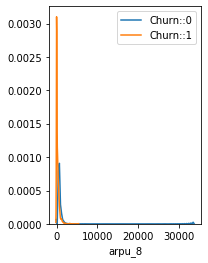

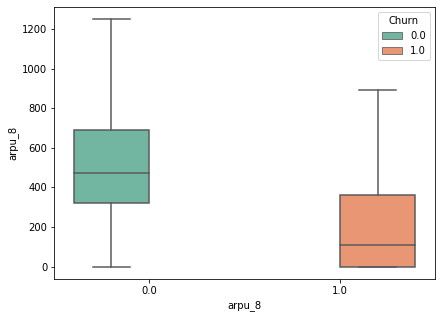

onnet_mou_8


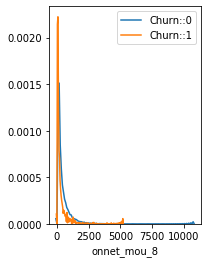

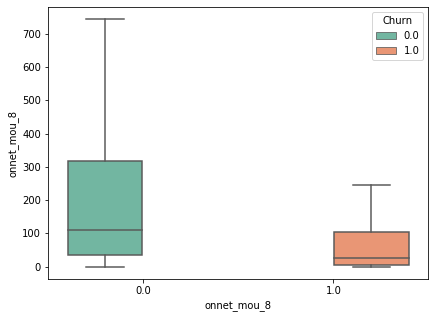

offnet_mou_8


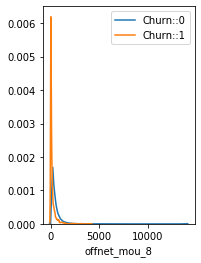

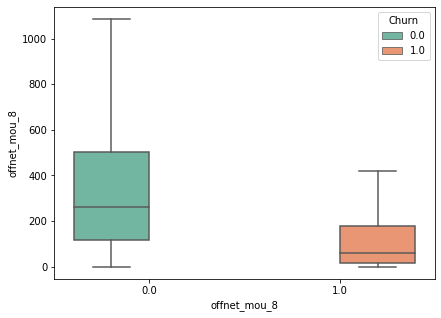

roam_ic_mou_8


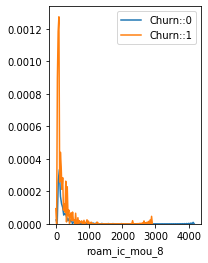

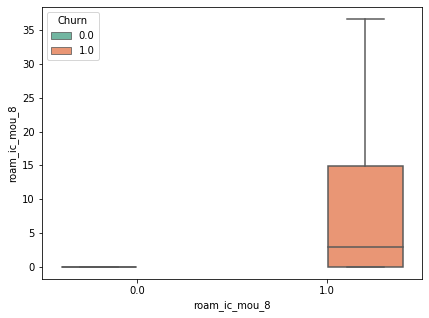

roam_og_mou_8


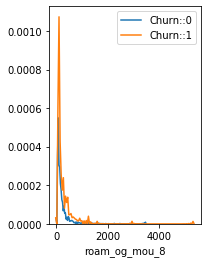

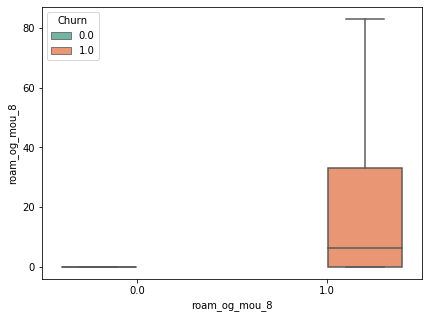

loc_og_t2t_mou_8


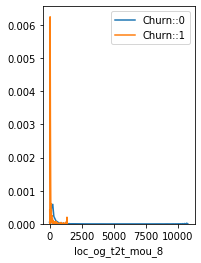

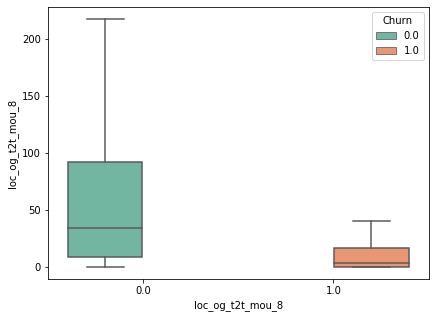

loc_og_t2m_mou_8


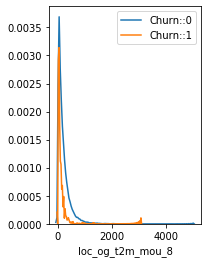

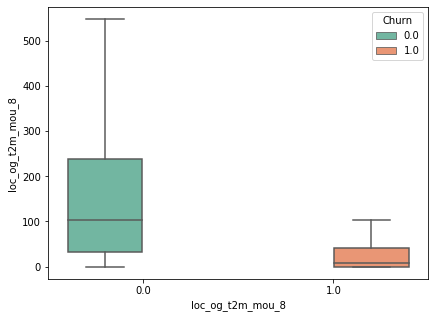

loc_og_t2f_mou_8


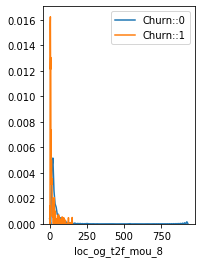

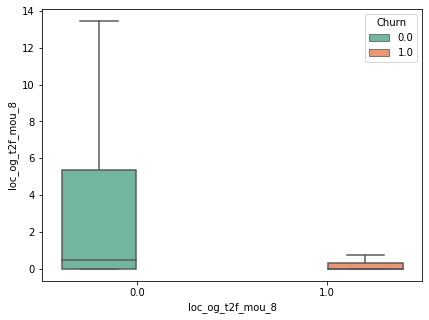

loc_og_t2c_mou_8


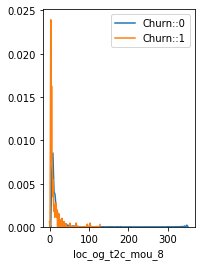

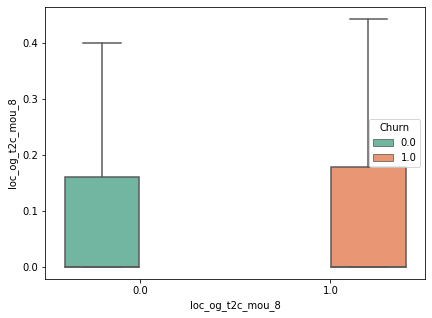

loc_og_mou_8


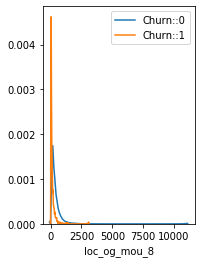

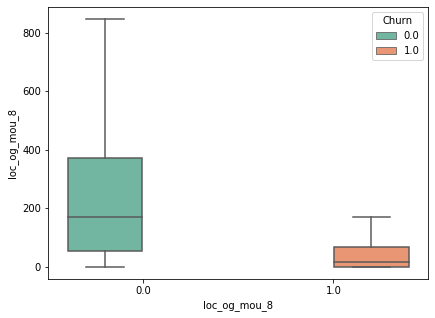

std_og_t2t_mou_8


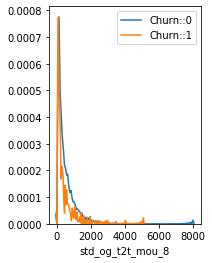

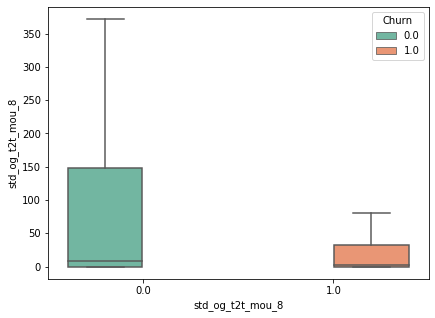

std_og_t2m_mou_8


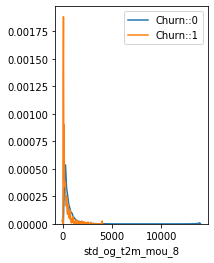

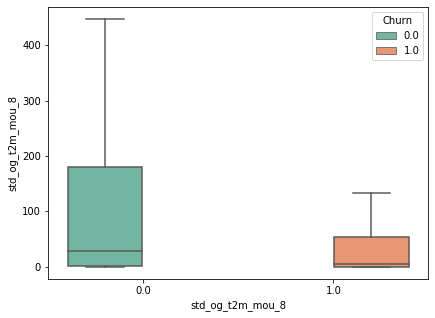

std_og_t2f_mou_8


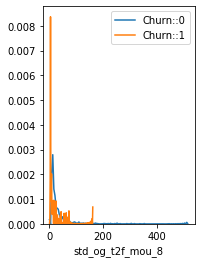

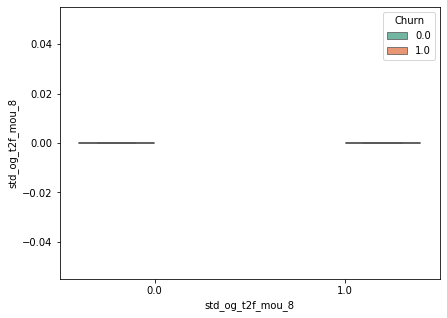

std_og_mou_8


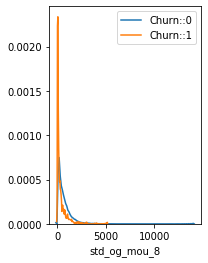

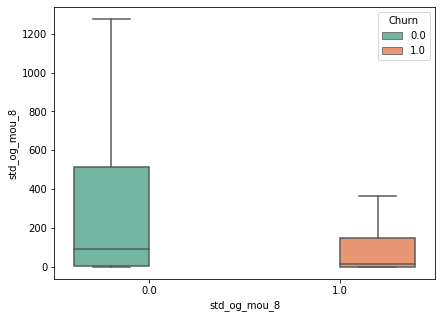

isd_og_mou_8


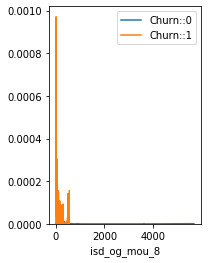

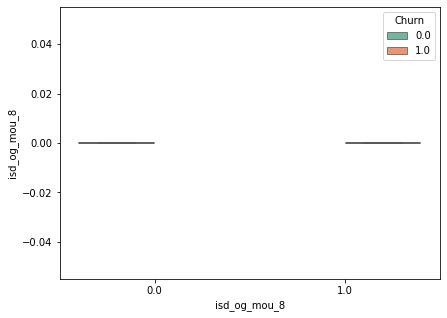

spl_og_mou_8


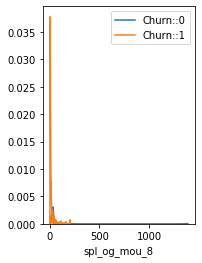

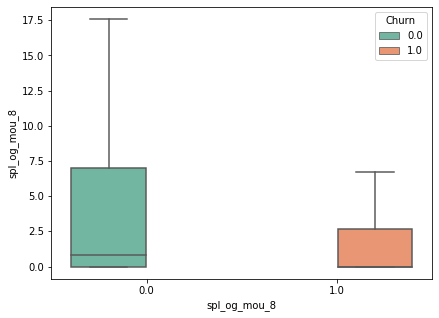

total_og_mou_8


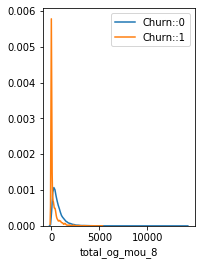

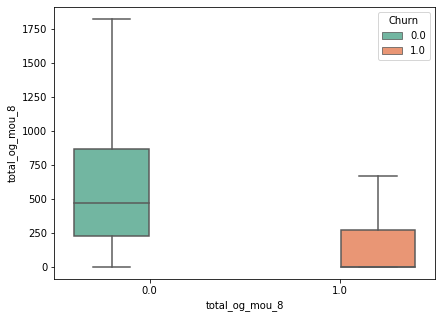

loc_ic_t2t_mou_8


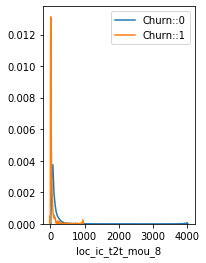

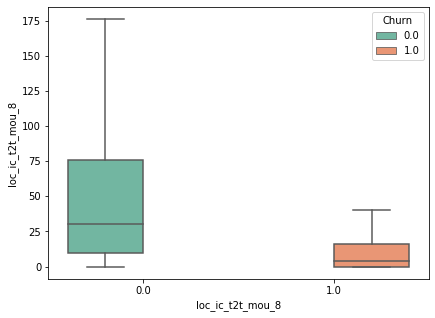

loc_ic_t2m_mou_8


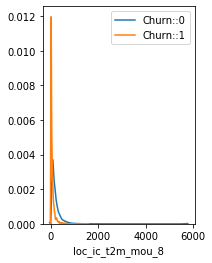

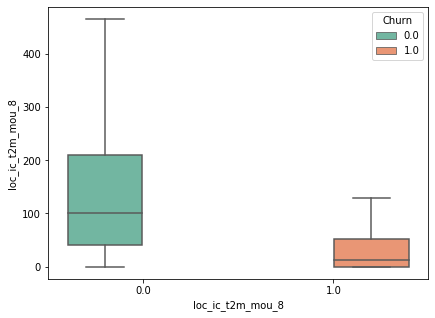

loc_ic_t2f_mou_8


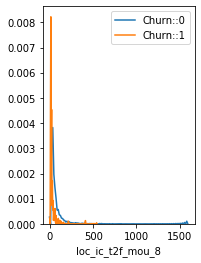

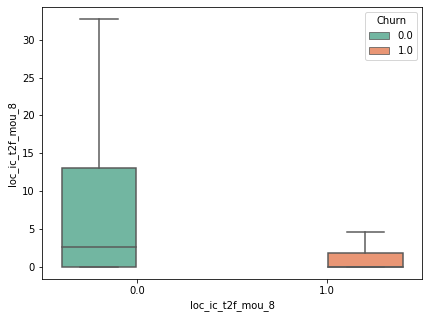

loc_ic_mou_8


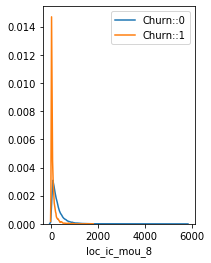

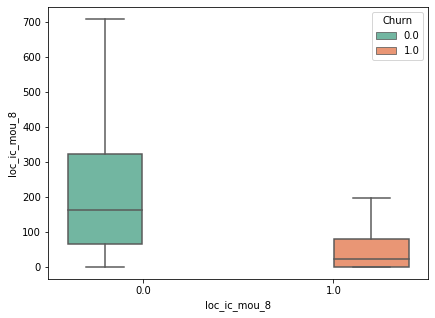

std_ic_t2t_mou_8


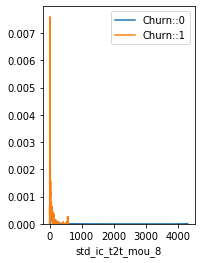

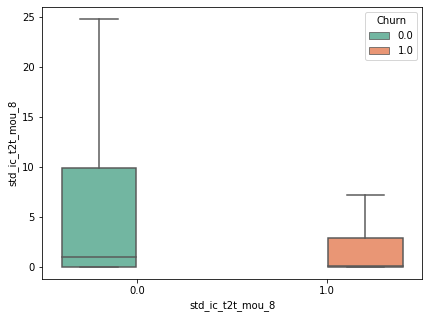

std_ic_t2m_mou_8


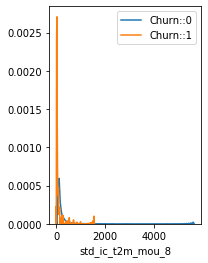

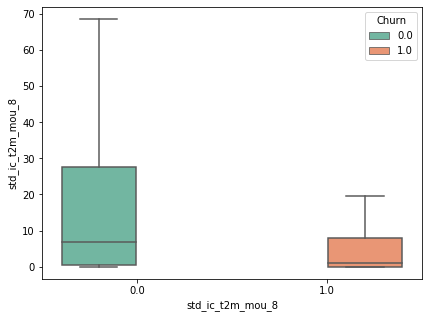

std_ic_t2f_mou_8


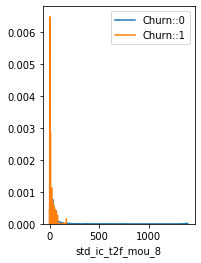

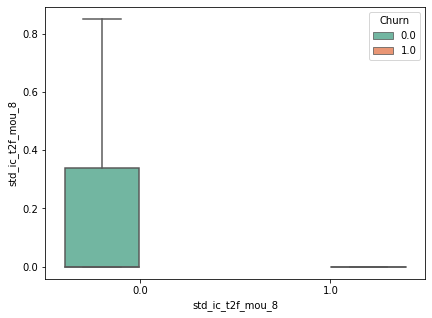

std_ic_mou_8


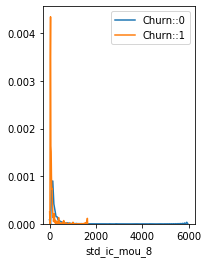

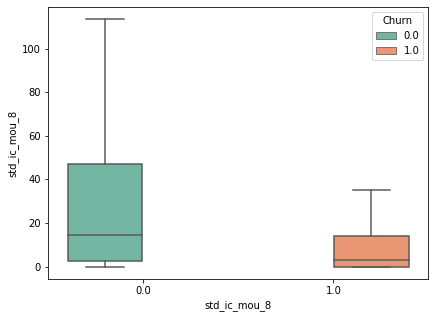

total_ic_mou_8


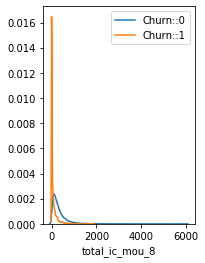

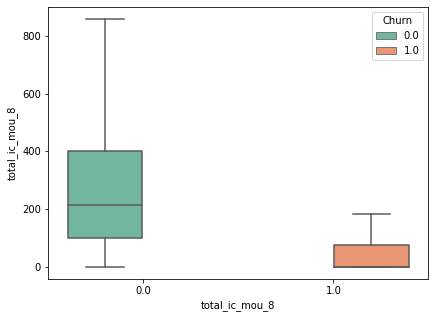

spl_ic_mou_8


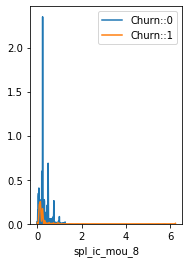

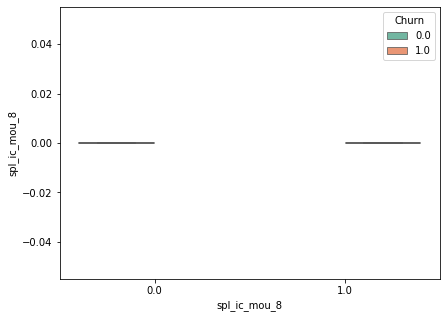

isd_ic_mou_8


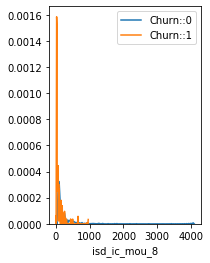

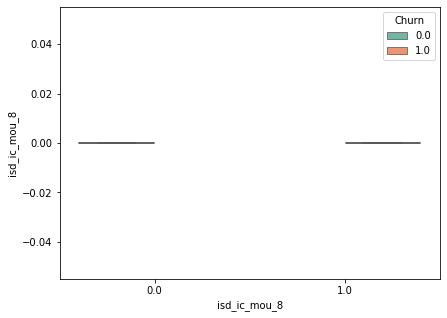

ic_others_8


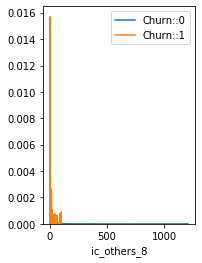

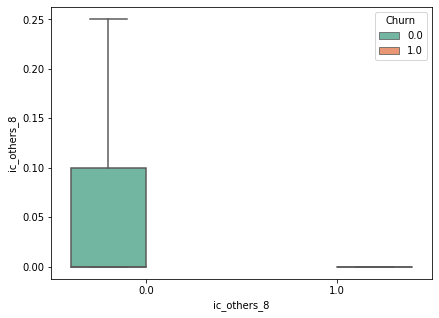

total_rech_num_8


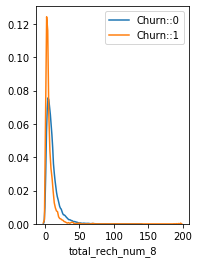

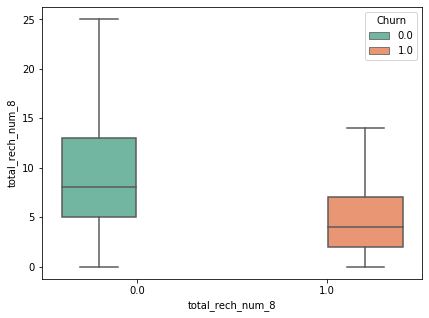

total_rech_amt_8


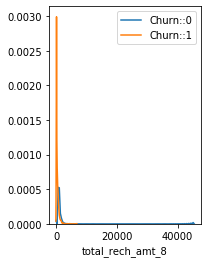

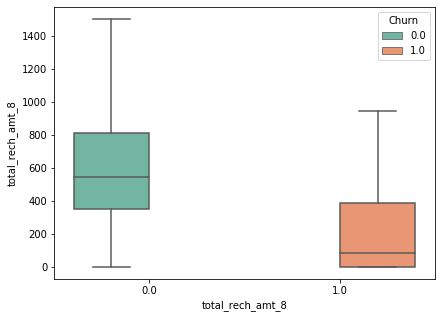

max_rech_amt_8


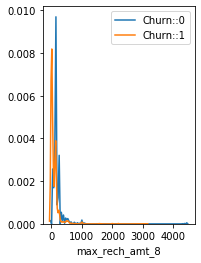

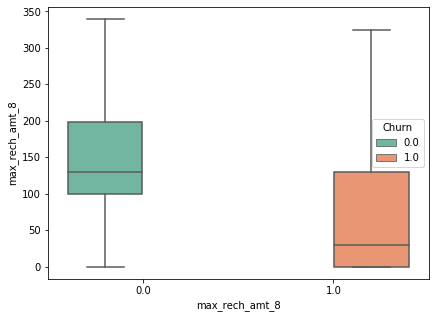

last_day_rch_amt_8


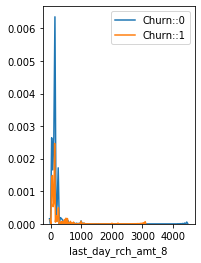

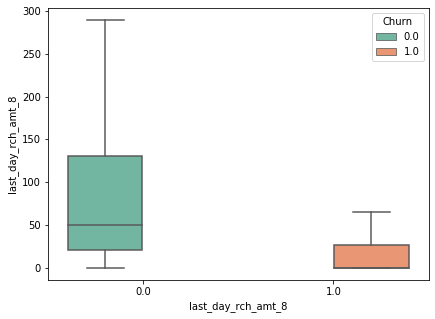

vol_2g_mb_8


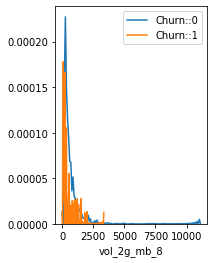

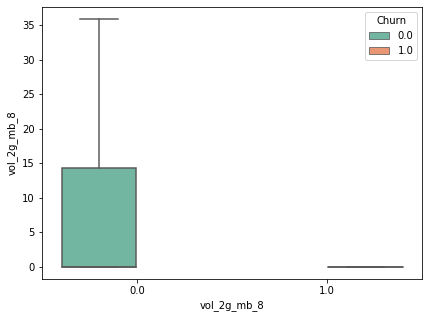

vol_3g_mb_8


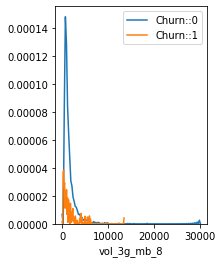

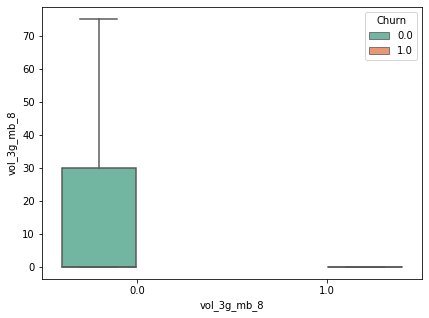

sachet_2g_8


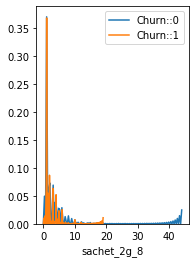

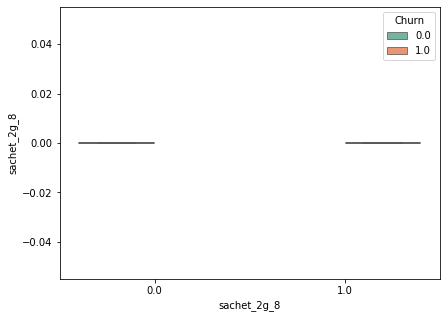

fb_user_8


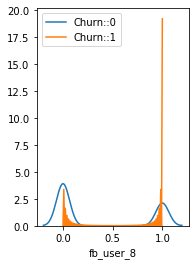

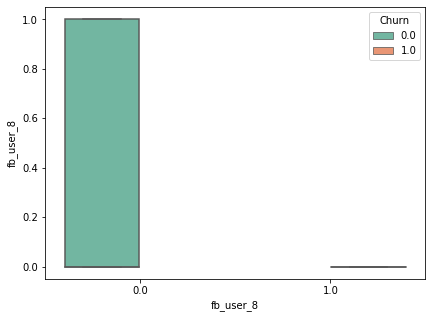

total_avg_rech_GPhase


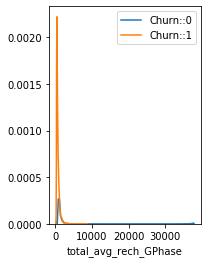

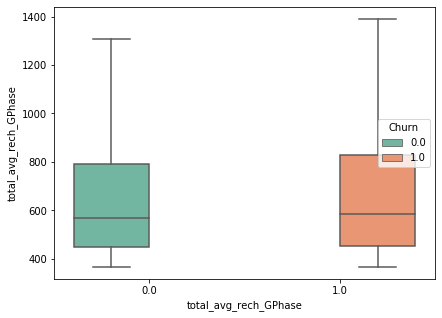

Churn


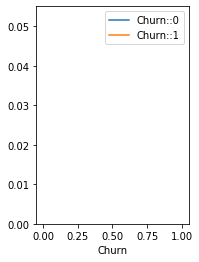

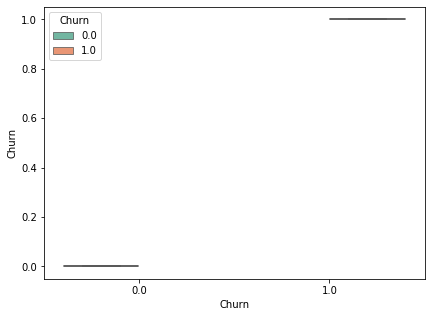

vbc_3g_8


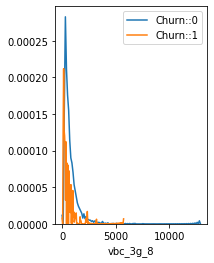

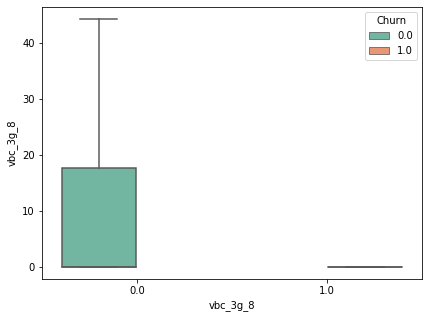

fb_user67


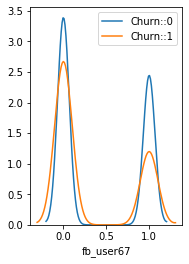

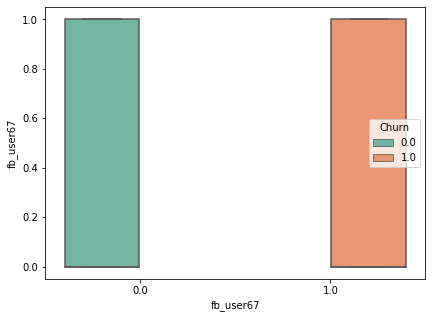

avg_arpu_av67


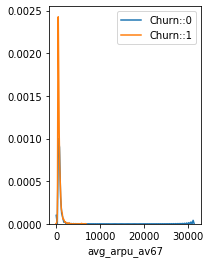

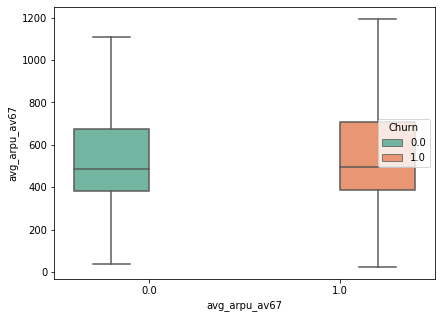

avg_onnet_mou_av67


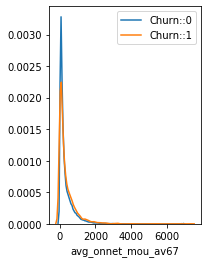

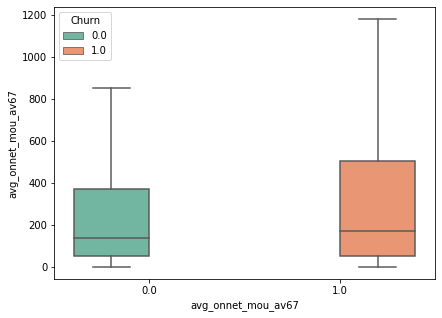

avg_offnet_mou_av67


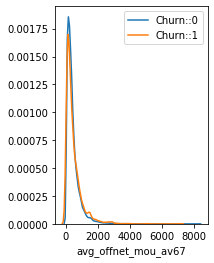

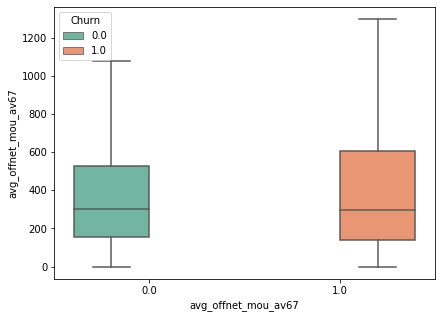

avg_roam_ic_mou_av67


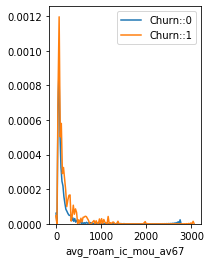

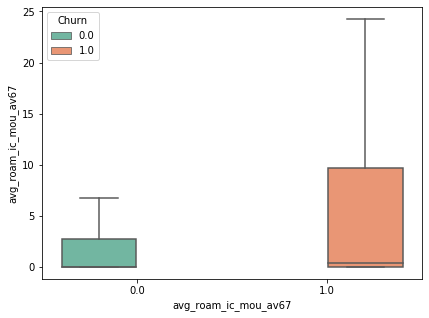

avg_roam_og_mou_av67


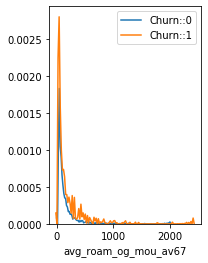

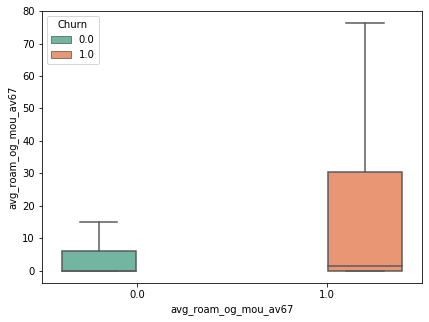

avg_loc_og_t2t_mou_av67


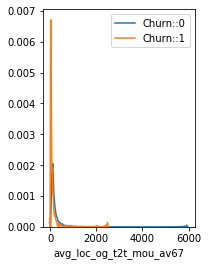

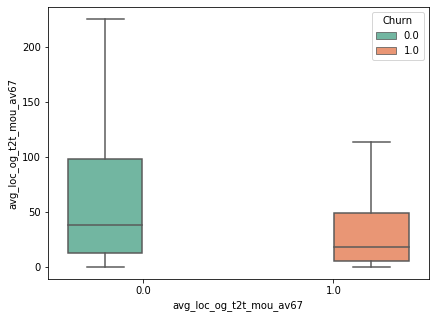

avg_loc_og_t2m_mou_av67


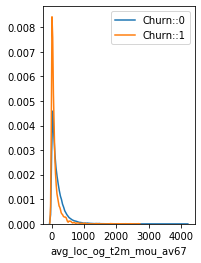

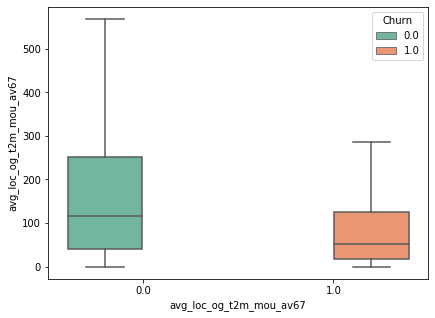

avg_loc_og_t2f_mou_av67


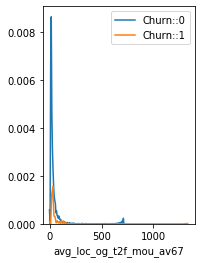

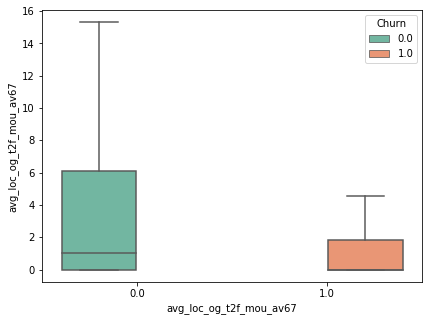

avg_loc_og_t2c_mou_av67


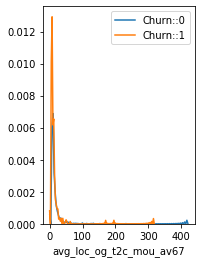

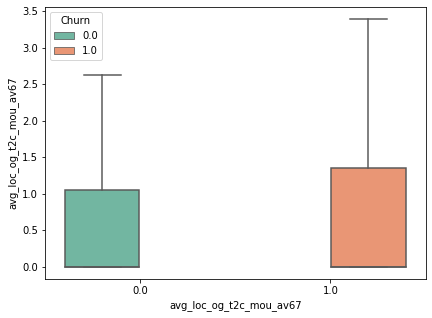

avg_loc_og_mou_av67


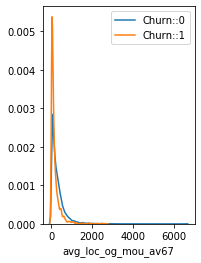

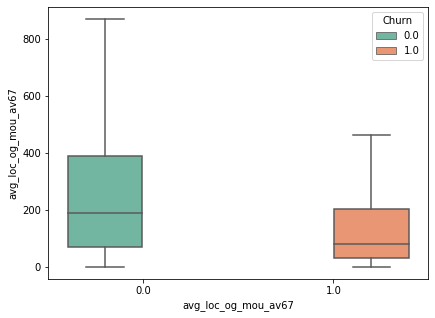

avg_std_og_t2t_mou_av67


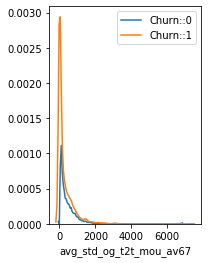

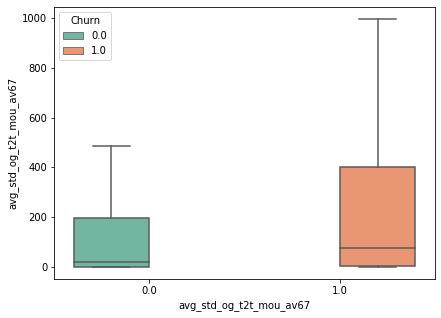

avg_std_og_t2m_mou_av67


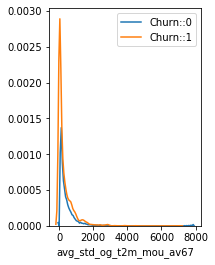

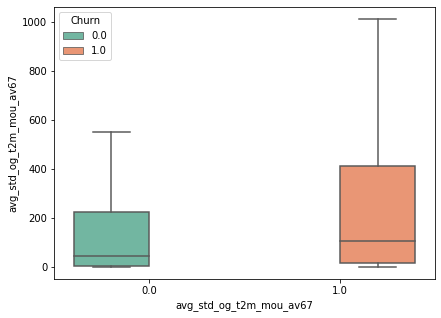

avg_std_og_t2f_mou_av67


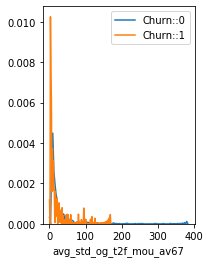

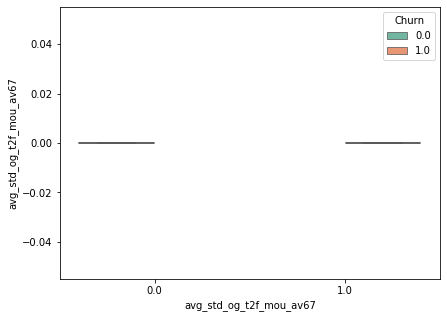

avg_std_og_mou_av67


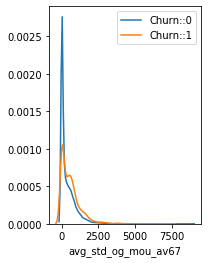

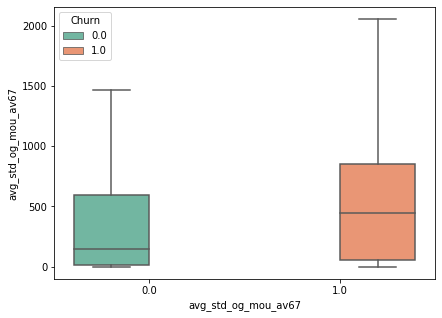

avg_isd_og_mou_av67


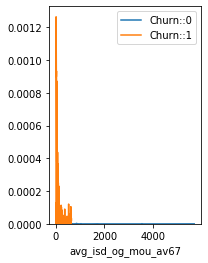

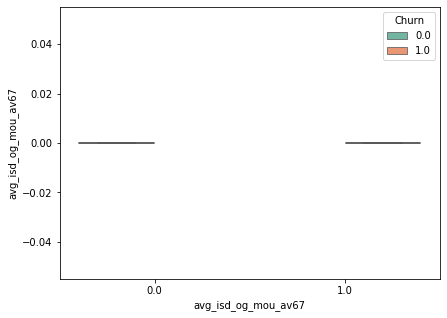

avg_spl_og_mou_av67


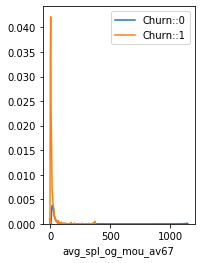

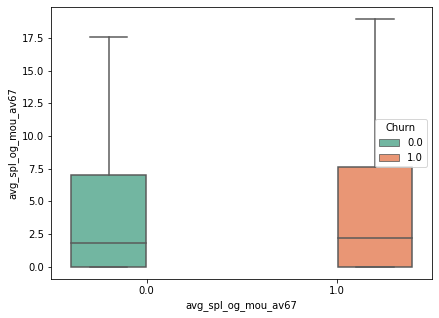

avg_og_others_av67


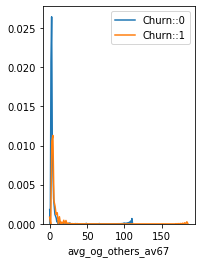

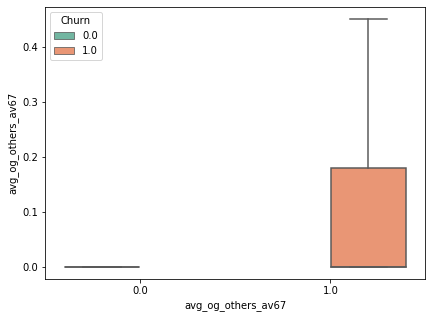

avg_total_og_mou_av67


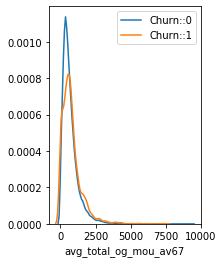

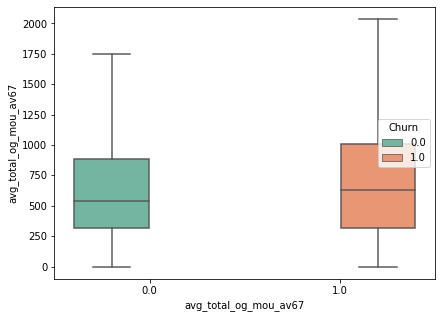

avg_loc_ic_t2t_mou_av67


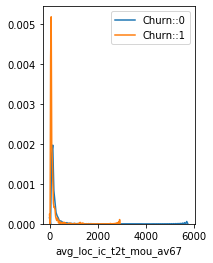

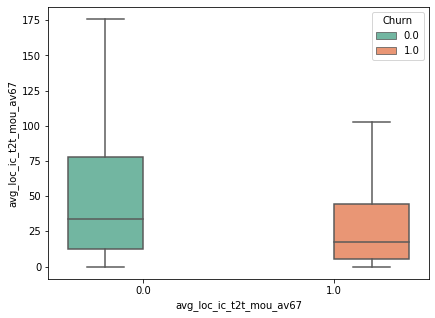

avg_loc_ic_t2m_mou_av67


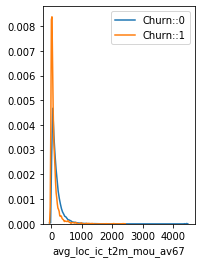

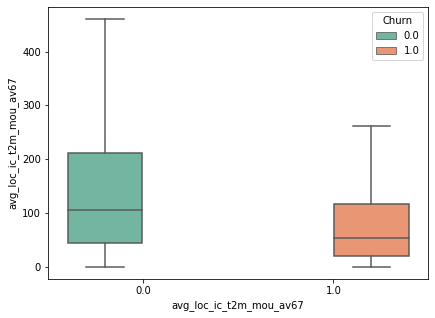

avg_loc_ic_t2f_mou_av67


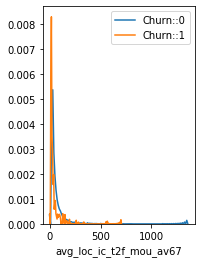

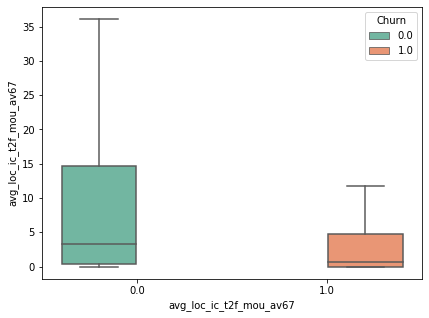

avg_loc_ic_mou_av67


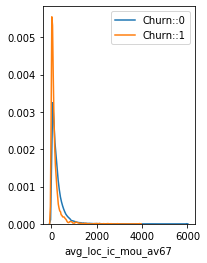

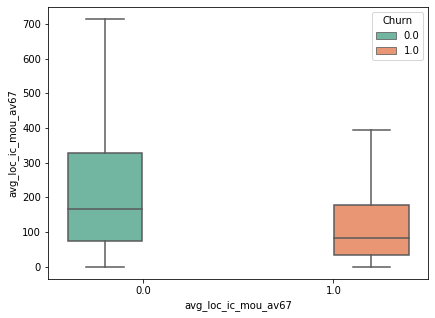

avg_std_ic_t2t_mou_av67


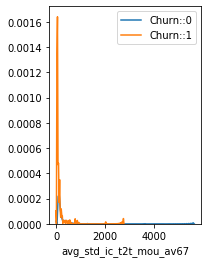

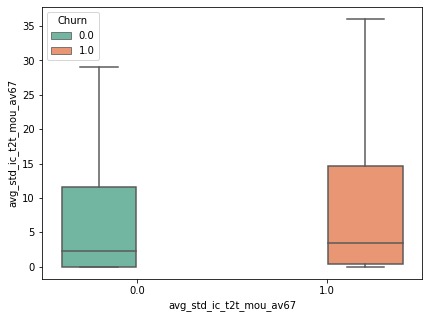

avg_std_ic_t2m_mou_av67


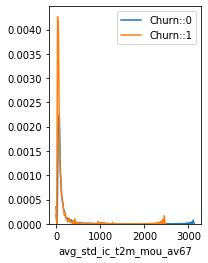

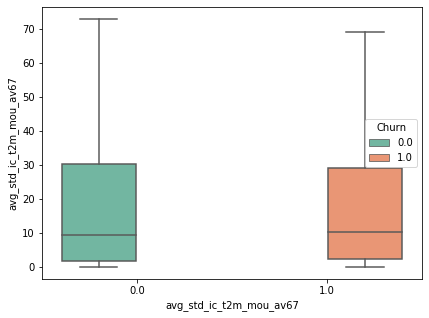

avg_std_ic_t2f_mou_av67


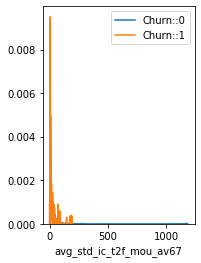

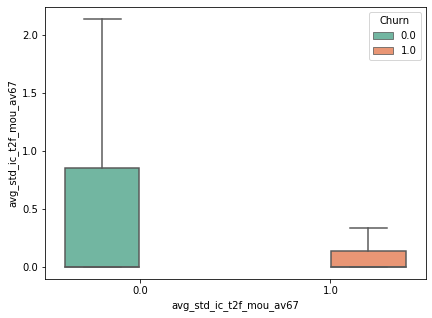

avg_std_ic_mou_av67


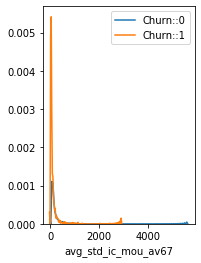

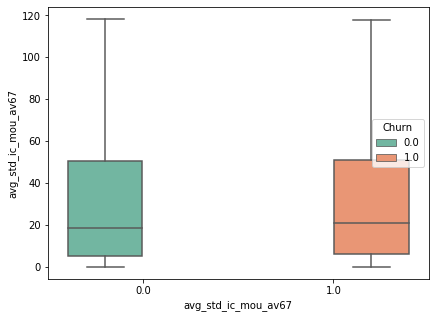

avg_total_ic_mou_av67


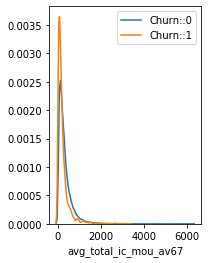

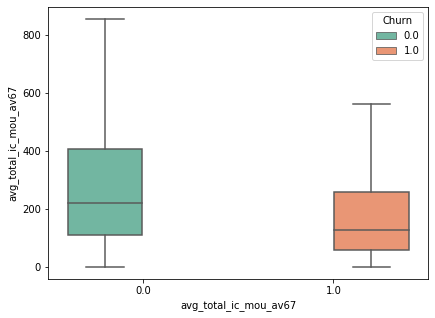

avg_spl_ic_mou_av67


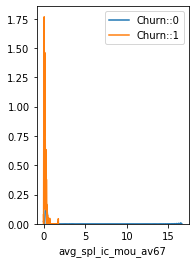

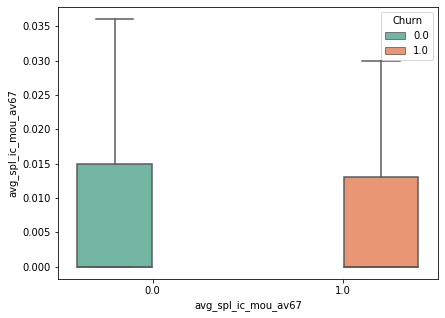

avg_isd_ic_mou_av67


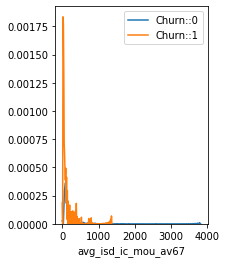

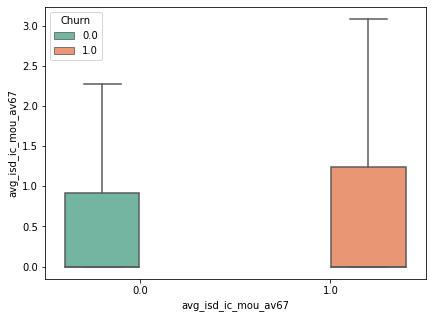

avg_ic_others_av67


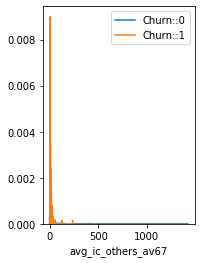

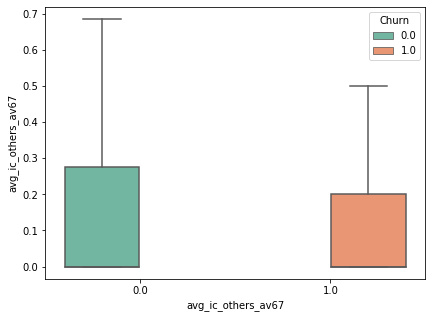

avg_total_rech_num_av67


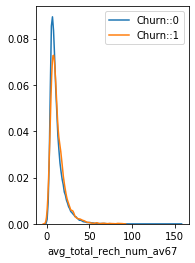

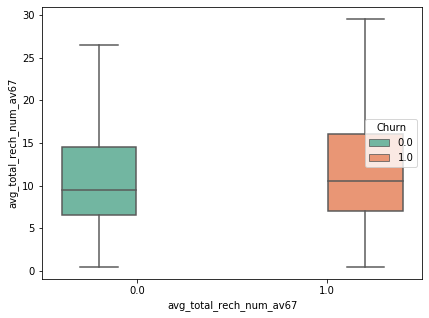

avg_total_rech_amt_av67


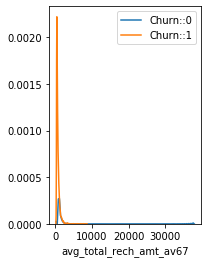

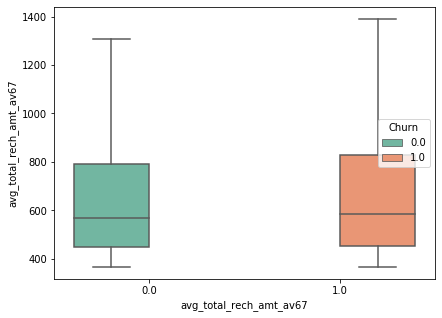

avg_max_rech_amt_av67


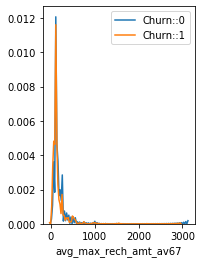

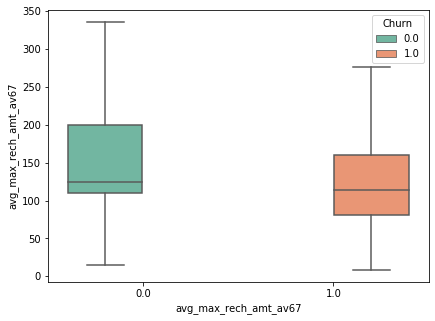

avg_last_day_rch_amt_av67


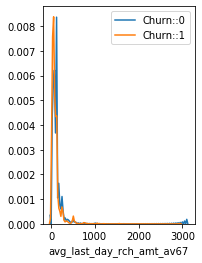

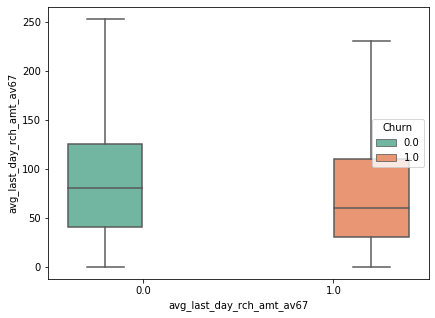

avg_vol_2g_mb_av67


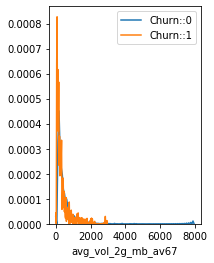

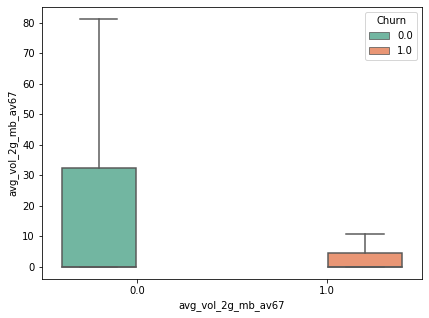

avg_vol_3g_mb_av67


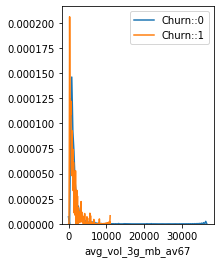

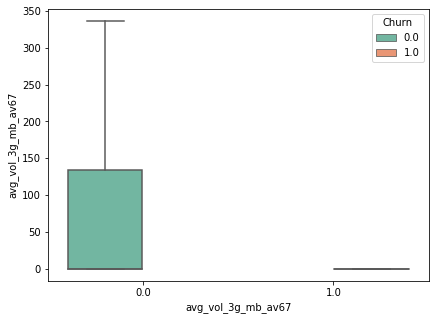

avg_monthly_2g_av67


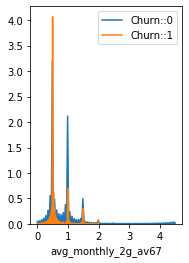

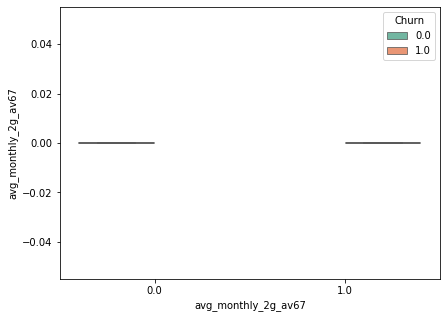

avg_sachet_2g_av67


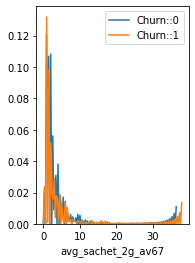

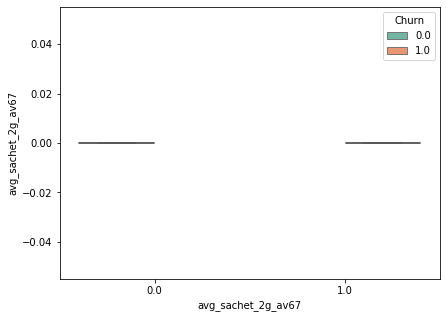

avg_monthly_3g_av67


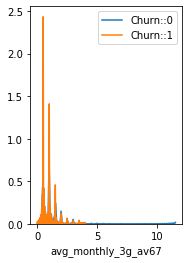

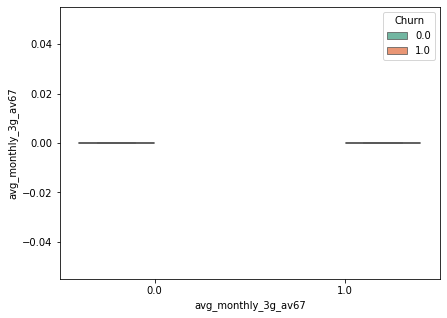

avg_vbc_3g_av67


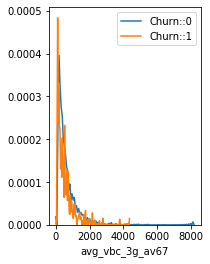

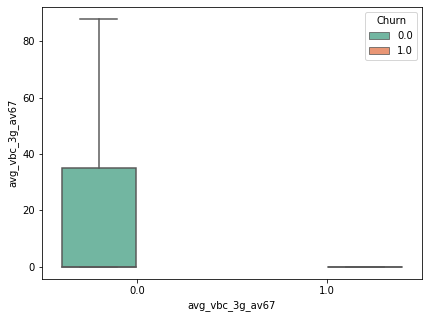

aon_mon


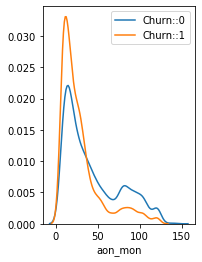

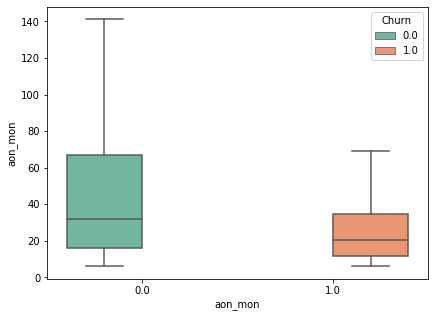

In [61]:
for i in dist_plts_features:
    print(i)
    fun_plotcont(i)

#### correlation coefficient w.r.t Churn

In [62]:
# Let's look at the correlation coefficient w.r.t Churn 
churn_corr= data_clean.corr()["Churn"].sort_values(ascending=False)[1:].to_frame()
churn_corr.columns= ['Correlation_Value']
churn_corr['abs_corr']= abs(churn_corr.Correlation_Value)
churn_corr.sort_values('abs_corr', ascending=False)[:20]

,Correlation_Value,abs_corr
total_ic_mou_8,-0.190203,0.190203
arpu_8,-0.177832,0.177832
total_rech_amt_8,-0.177341,0.177341
total_og_mou_8,-0.175417,0.175417
loc_ic_mou_8,-0.168236,0.168236
loc_og_mou_8,-0.164670,0.164670
loc_og_t2m_mou_8,-0.164221,0.164221
loc_ic_t2m_mou_8,-0.155642,0.155642
fb_user_8,-0.154033,0.154033
total_rech_num_8,-0.147851,0.147851


`total_ic_mou_8` is the highest correlated variable with the target variable

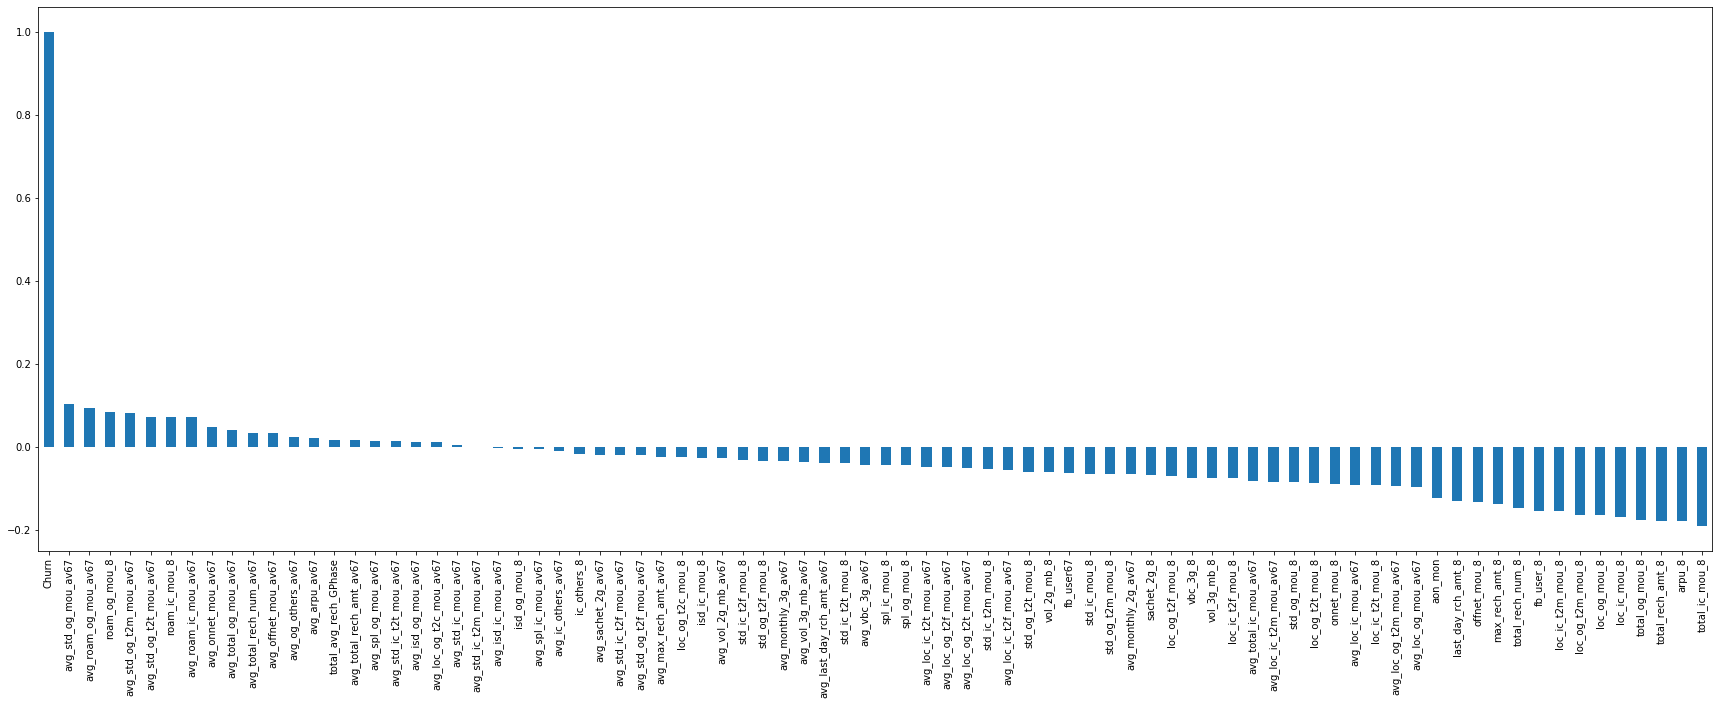

In [63]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(30,10))
data_clean.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [64]:
corr_matrix_1=data_clean.corr()

np.ones(corr_matrix_1.shape)
np.triu(np.ones(corr_matrix_1.shape),k=0)
corr_matrix_1=corr_matrix_1.where(np.triu(np.ones(corr_matrix_1.shape),k=1).astype(np.bool))
CM_1=corr_matrix_1.unstack().reset_index()
CM_1.columns= ['VAR1','VAR2','Correlation']
CM_1=CM_1.dropna(subset=['Correlation'])
CM_1=CM_1[CM_1.VAR1 != CM_1.VAR2]
CM_1.Correlation=abs(CM_1.Correlation)
CM_1.sort_values('Correlation',ascending=False)[:5]

,VAR1,VAR2,Correlation
5941,avg_total_rech_amt_av67,total_avg_rech_GPhase,1.000000
3399,avg_arpu_av67,total_avg_rech_GPhase,0.978768
5945,avg_total_rech_amt_av67,avg_arpu_av67,0.978768
2460,total_rech_amt_8,arpu_8,0.961201
4524,avg_isd_og_mou_av67,isd_og_mou_8,0.951373


In [65]:
#these columns are same
data_clean.drop("avg_total_rech_amt_av67", inplace=True, axis=1)

In [66]:
#looking at the correlation again
corr_matrix_1=data_clean.corr()

np.ones(corr_matrix_1.shape)
np.triu(np.ones(corr_matrix_1.shape),k=0)
corr_matrix_1=corr_matrix_1.where(np.triu(np.ones(corr_matrix_1.shape),k=1).astype(np.bool))
CM_1=corr_matrix_1.unstack().reset_index()
CM_1.columns= ['VAR1','VAR2','Correlation']
CM_1=CM_1.dropna(subset=['Correlation'])
CM_1=CM_1[CM_1.VAR1 != CM_1.VAR2]
CM_1.Correlation=abs(CM_1.Correlation)
CM_1.sort_values('Correlation',ascending=False)[:5]

,VAR1,VAR2,Correlation
3358,avg_arpu_av67,total_avg_rech_GPhase,0.978768
2430,total_rech_amt_8,arpu_8,0.961201
4469,avg_isd_og_mou_av67,isd_og_mou_8,0.951373
5489,avg_total_ic_mou_av67,avg_loc_ic_mou_av67,0.891431
2045,total_ic_mou_8,loc_ic_mou_8,0.887449


`aon`: depicts age on the newtwork column. Converting to months and looking into insights drawn:

Text(0.5, 1.0, 'Customers by their tenure')

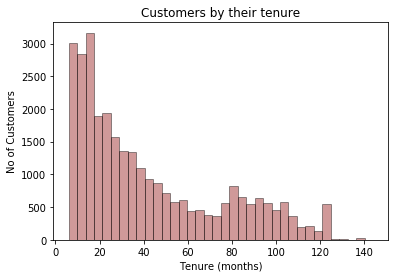

In [67]:
ax = sns.distplot(data_clean['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by their tenure')

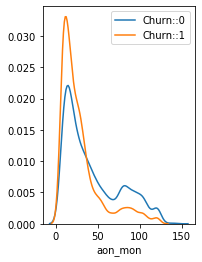

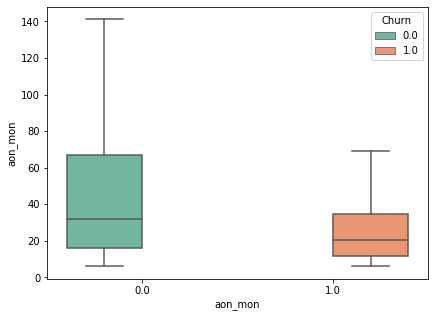

In [68]:
fun_plotcont('aon_mon')

There are large number of high value customers who are less than 20 months old.
Median aon_mon for churners is approximately 20 months, where as for non-churners its close to 30 months. Also, within 50 months of age on the network, customers tend to churn more. That is, older high value customers churn less.

In [69]:
data_clean.shape

(29862, 81)

# 5. Handling Data Imbalance <a id="5"></a>

###  Create Train and Test Sets

In [70]:
from sklearn.model_selection import train_test_split
y = data_clean.Churn
X = data_clean.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

In [71]:
print(y_train.value_counts())
100*y_train.value_counts(normalize = True).reset_index()

0.0    19138
1.0     1765
Name: Churn, dtype: int64


,index,Churn
0,0.0,91.556236
1,100.0,8.443764


In [72]:
print(y_test.value_counts())
100*y_test.value_counts(normalize = True).reset_index()

0.0    8203
1.0     756
Name: Churn, dtype: int64


,index,Churn
0,0.0,91.561558
1,100.0,8.438442


getting the same churn percentage.

In [73]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_train_bal, y_train_bal = smt.fit_sample(X_train, y_train)
len(X_train_bal)

38276

In [74]:
X_train_bal.shape, y_train_bal.shape

((38276, 80), (38276,))

# 6. Modelling <a id="6"></a>

## Decision Tree

In [75]:
# Decision Trees - Base Model with only max_depth parameter value as 3.
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0, max_depth=3)
dtc.fit(X_train_bal, y_train_bal)
y_pred_train= dtc.predict(X_train_bal)
y_pred_dtc = dtc.predict(X_test)

In [76]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [77]:
def get_metrics(y_actual, y_pred):
    print ('Accuracy: ', accuracy_score(y_actual, y_pred))
    print ('F1 score: ', f1_score(y_actual, y_pred))
    print ('Recall: ', recall_score(y_actual, y_pred))
    print ('Precision: ', precision_score(y_actual, y_pred))
    print ('\n clasification report:\n', classification_report(y_actual,y_pred))
    print ('\n confussion matrix:\n',confusion_matrix(y_actual, y_pred))

In [78]:
print("*****************TRAIN SET***********************************")
get_metrics(y_train_bal, y_pred_train)
print("*****************TEST SET***********************************")
get_metrics(y_test, y_pred_dtc)

*****************TRAIN SET***********************************
Accuracy:  0.8815968230745115
F1 score:  0.8784008585994098
Recall:  0.8553140349043787
Precision:  0.9027685859254357

 clasification report:
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     19138
         1.0       0.90      0.86      0.88     19138

    accuracy                           0.88     38276
   macro avg       0.88      0.88      0.88     38276
weighted avg       0.88      0.88      0.88     38276


 confussion matrix:
 [[17375  1763]
 [ 2769 16369]]
*****************TEST SET***********************************
Accuracy:  0.8897198348029914
F1 score:  0.525911708253359
Recall:  0.7248677248677249
Precision:  0.4126506024096386

 clasification report:
               precision    recall  f1-score   support

         0.0       0.97      0.90      0.94      8203
         1.0       0.41      0.72      0.53       756

    accuracy                           0.89   

In [79]:
dtc.feature_importances_

array([0.        , 0.        , 0.        , 0.69037502, 0.01893254,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01745548, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01780593, 0.        , 0.        , 0.        , 0.        ,
       0.11473321, 0.        , 0.09751105, 0.        , 0.        ,
       0.        , 0.04318677, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [80]:
# Putting together the columns and their corrsponding feture importance 
feature_imp = pd.DataFrame() 
feature_imp["Columns"] = X_train.columns 
feature_imp['Feature_Importance'] = pd.Series(dtc.feature_importances_) 
feature_imp =feature_imp[feature_imp.Feature_Importance > 0]
feature_imp

,Columns,Feature_Importance
3,roam_ic_mou_8,0.690375
4,roam_og_mou_8,0.018933
16,total_og_mou_8,0.017455
25,total_ic_mou_8,0.017806
30,total_rech_amt_8,0.114733
32,last_day_rch_amt_8,0.097511
36,fb_user_8,0.043187


In [81]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df= fi_df[fi_df.feature_importance >0]
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + '  Feature Importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

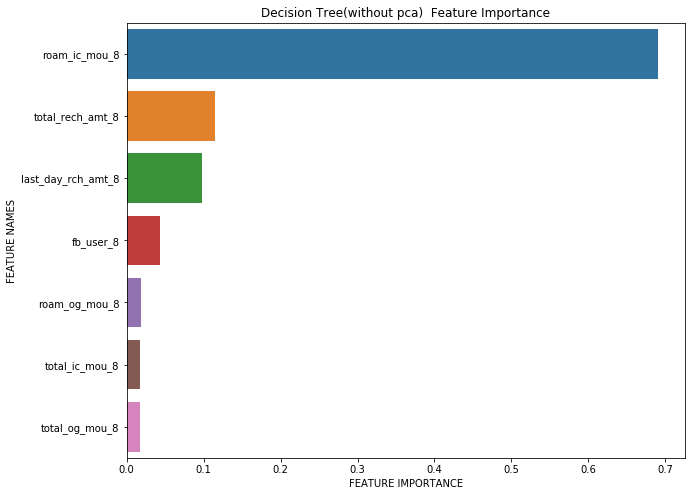

In [82]:
plot_feature_importance(dtc.feature_importances_,X_train.columns,'Decision Tree(without pca)')

### Hyper Parameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [84]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [3,5,6,7],
    'min_samples_leaf': [10,12,13, 15,20,30,40,50],
    'criterion': ["gini", "entropy"]
}

In [85]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [86]:
%%time
grid_search.fit(X_train_bal, y_train_bal)

Fitting 4 folds for each of 64 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:  1.3min finished


Wall time: 1min 21s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 7],
                         'min_samples_leaf': [10, 12, 13, 15, 20, 30, 40, 50]},
             scoring='recall', verbose=1)

In [87]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=10,
                       random_state=42)

In [88]:
dt_best = grid_search.best_estimator_

In [89]:
y_pred_train= dt_best.predict(X_train_bal)
y_pred_dt = dt_best.predict(X_test)

In [90]:
print("*****************TRAIN SET***********************************")
get_metrics(y_train_bal, y_pred_train)
print("*****************TEST SET***********************************")
get_metrics(y_test, y_pred_dt)

*****************TRAIN SET***********************************
Accuracy:  0.9087156442679486
F1 score:  0.9090672496356443
Recall:  0.9125822970007316
Precision:  0.905579176604791

 clasification report:
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.91     19138
         1.0       0.91      0.91      0.91     19138

    accuracy                           0.91     38276
   macro avg       0.91      0.91      0.91     38276
weighted avg       0.91      0.91      0.91     38276


 confussion matrix:
 [[17317  1821]
 [ 1673 17465]]
*****************TEST SET***********************************
Accuracy:  0.8830226587788815
F1 score:  0.5028462998102466
Recall:  0.701058201058201
Precision:  0.39201183431952663

 clasification report:
               precision    recall  f1-score   support

         0.0       0.97      0.90      0.93      8203
         1.0       0.39      0.70      0.50       756

    accuracy                           0.88   

In [91]:
# Putting together the columns and their corrsponding feture importance 
feature_imp_dt_hpt = pd.DataFrame() 
feature_imp_dt_hpt["Columns"] = X_train.columns 
feature_imp_dt_hpt['Feature_Importance'] = pd.Series(dt_best.feature_importances_) 
feature_imp_dt_hpt = feature_imp_dt_hpt[feature_imp_dt_hpt.Feature_Importance > 0]
feature_imp_dt_hpt = feature_imp_dt_hpt.sort_values('Feature_Importance',ascending=False)
feature_imp_dt_hpt

,Columns,Feature_Importance
3,roam_ic_mou_8,0.501258
30,total_rech_amt_8,0.107677
31,max_rech_amt_8,0.102773
36,fb_user_8,0.065897
32,last_day_rch_amt_8,0.043948
25,total_ic_mou_8,0.033445
4,roam_og_mou_8,0.022777
16,total_og_mou_8,0.014375
64,avg_std_ic_t2f_mou_av67,0.012810
20,loc_ic_mou_8,0.011961


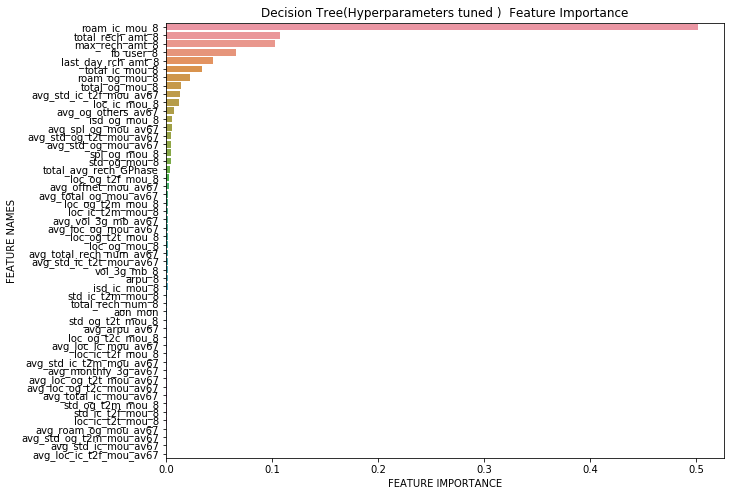

In [92]:
plot_feature_importance(dt_best.feature_importances_,X_train.columns,'Decision Tree(Hyperparameters tuned )')

# Scaling

In [93]:
cols=list(X_train_bal.columns)
len(cols)

80

In [94]:
cols.remove("fb_user67")
cols.remove("fb_user_8")
len(cols)

78

In [95]:
scaler = StandardScaler()

X_train_bal[cols] = scaler.fit_transform(X_train_bal[cols])
X_test[cols]=scaler.transform(X_test[cols])

In [96]:
X_train_bal.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,fb_user_8,total_avg_rech_GPhase,vbc_3g_8,fb_user67,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_vbc_3g_av67,aon_mon
0,-0.398062,-0.494141,-0.630813,-0.222418,-0.258982,-0.306669,-0.508504,-0.285249,-0.235225,-0.530705,-0.369463,-0.382354,-0.127793,-0.504042,-0.05852,-0.205420,-0.679869,-0.305435,-0.378383,-0.297137,-0.448980,-0.182743,-0.234798,-0.123848,-0.281862,-0.465994,-0.19725,-0.139251,0.035797,0.916379,-0.445005,-0.619682,-0.538983,1.232620,0.722970,9.753248,1.0,-0.659770,2.844531,1,-0.707841,-0.641382,-0.586171,-0.241941,-0.307041,-0.377904,0.003057,-0.230321,-0.250378,-0.244428,-0.484361,-0.546633,-0.165845,-0.725927,-0.085035,-0.333118,-0.004511,-0.832725,-0.245342,2.679963,-0.336000,1.699684,-0.007435,-0.272212,-0.161726,-0.220627,1.377311,0.090027,-0.195434,-0.084681,-0.112331,-0.597797,-0.525374,0.233718,-0.203864,-0.337713,1.029270,-0.320906,-0.054842,-0.754462
1,-0.499495,-0.384974,-0.382488,-0.222418,-0.258982,-0.147442,-0.142104,-0.055209,-0.235225,-0.184356,-0.325990,-0.297558,-0.127793,-0.418228,-0.05852,-0.128809,-0.438182,-0.240150,-0.167129,-0.300320,-0.270655,0.609684,-0.211282,-0.123848,0.122132,0.024417,-0.19725,0.901755,-0.087987,-0.014626,-0.426806,-0.459967,-0.120649,-0.200839,-0.240872,-0.280875,0.0,-0.652504,-0.272147,1,-0.640860,-0.538816,-0.692904,-0.241941,-0.307041,-0.213769,-0.315148,-0.217008,-0.250378,-0.354908,-0.446850,-0.542499,-0.165845,-0.696887,-0.085035,0.413266,-0.176892,-0.839848,-0.281077,-0.342443,-0.291328,-0.414147,0.406599,0.232337,-0.161726,0.362390,-0.131819,-0.149667,0.539835,-0.101930,-0.294246,-0.436921,-0.432611,0.144705,-0.302993,-0.337713,0.693851,-0.320906,-0.323575,-0.344463
2,0.987087,-0.104836,-0.233040,2.014668,2.422914,-0.307945,-0.568695,-0.285249,-0.235225,-0.570637,-0.369463,-0.382354,-0.127793,-0.504042,-0.05852,-0.286787,-0.701394,-0.354577,-0.584988,-0.300320,-0.616964,-0.207316,-0.265982,-0.123848,-0.317230,-0.623258,-0.19725,-0.139251,-0.087987,0.218125,0.646940,-0.140537,0.297684,-0.200839,-0.240872,-0.280875,0.0,-0.305829,-0.272147,0,-0.561760,-0.586789,-0.728586,0.749420,0.357431,-0.359808,-0.529541,-0.244323,-0.250378,-0.588414,-0.507712,-0.556816,-0.165845,-0.749380,-0.085035,-0.418471,-0.176892,-1.025636,-0.387123,-0.324903,-0.123775,-0.432208,-0.227619,-0.278428,-0.161726,-0.342782,-0.530764,-0.389360,-0.195434,-0.101930,-0.779353,0.414377,1.190747,-0.289801,-0.302993,-0.337713,-0.312408,-0.320906,-0.323575,1.592870
3,0.619040,-0.091652,0.077967,6.995016,3.495863,-0.307945,-0.568695,-0.285249,-0.235225,-0.570637,-0.364360,-0.382354,-0.127793,-0.500656,-0.05852,-0.286787,-0.698468,-0.354577,-0.584988,-0.300320,-0.616964,0.068491,-0.265982,-0.123848,-0.182757,-0.577

# PCA for dimensionality reduction

In [97]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train_bal)

PCA(random_state=42)

In [98]:
pca.components_

array([[ 2.18605894e-01,  1.02388621e-01,  1.65429984e-01, ...,
         5.45273722e-02,  6.68250379e-02,  8.91832694e-02],
       [ 1.31252029e-01,  2.08038836e-01,  1.66980703e-01, ...,
        -7.48989650e-02, -8.31168660e-02, -9.24869117e-02],
       [ 1.87658914e-01, -4.58116593e-02,  1.63392836e-03, ...,
         2.11368105e-01,  2.02170182e-01,  1.84363762e-02],
       ...,
       [-5.38549035e-08, -8.50432484e-06, -7.15802520e-06, ...,
        -3.91230757e-07,  2.31755335e-07,  4.18294530e-08],
       [ 2.97044884e-07,  1.75120648e-07,  2.01837096e-07, ...,
        -1.35581419e-07, -1.18315448e-07, -1.66915999e-07],
       [ 3.46463893e-08,  1.07819671e-07,  1.22981517e-07, ...,
         2.58718096e-08,  2.40755229e-08,  1.01787587e-07]])

In [99]:
pca.explained_variance_ratio_

array([1.25131546e-01, 9.23198242e-02, 6.35097444e-02, 5.07676384e-02,
       4.29691648e-02, 3.92953085e-02, 3.58024116e-02, 3.30901031e-02,
       3.11189713e-02, 3.02226647e-02, 2.86459009e-02, 2.50363355e-02,
       2.38412023e-02, 2.25605596e-02, 2.11966149e-02, 1.95247344e-02,
       1.77553822e-02, 1.70295124e-02, 1.58671343e-02, 1.53799803e-02,
       1.49619435e-02, 1.32955594e-02, 1.19277878e-02, 1.15313342e-02,
       1.07933314e-02, 1.04709367e-02, 1.03609547e-02, 9.96944266e-03,
       9.67854910e-03, 9.31638433e-03, 9.24015858e-03, 8.79022378e-03,
       8.43611666e-03, 8.16601823e-03, 7.70730344e-03, 7.46266119e-03,
       7.09317422e-03, 6.78344933e-03, 5.47679348e-03, 4.99853858e-03,
       4.70388006e-03, 4.40840486e-03, 4.22078619e-03, 4.06070918e-03,
       3.78205457e-03, 3.65889859e-03, 3.55383489e-03, 3.43276514e-03,
       3.25529022e-03, 3.17835324e-03, 3.02038690e-03, 2.89487815e-03,
       2.72761137e-03, 2.45065290e-03, 2.14552443e-03, 2.03813037e-03,
      

<BarContainer object of 80 artists>

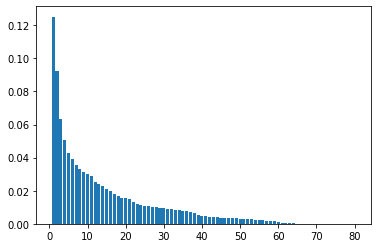

In [100]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

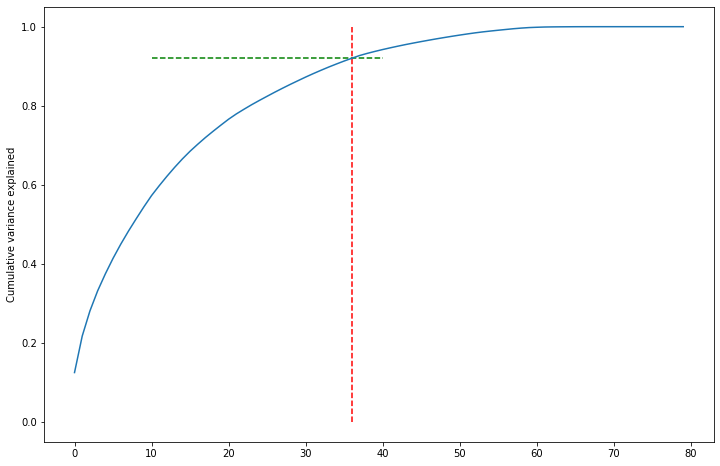

In [101]:
#Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=36, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.92, xmax=40, xmin=10, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [102]:
from sklearn.decomposition import IncrementalPCA

In [103]:
pca_final = IncrementalPCA(n_components=36)

In [104]:
df_train_pca = pca_final.fit_transform(X_train_bal)

In [105]:
df_train_pca.shape

(38276, 36)

In [106]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [107]:
corrmat.shape

(36, 36)

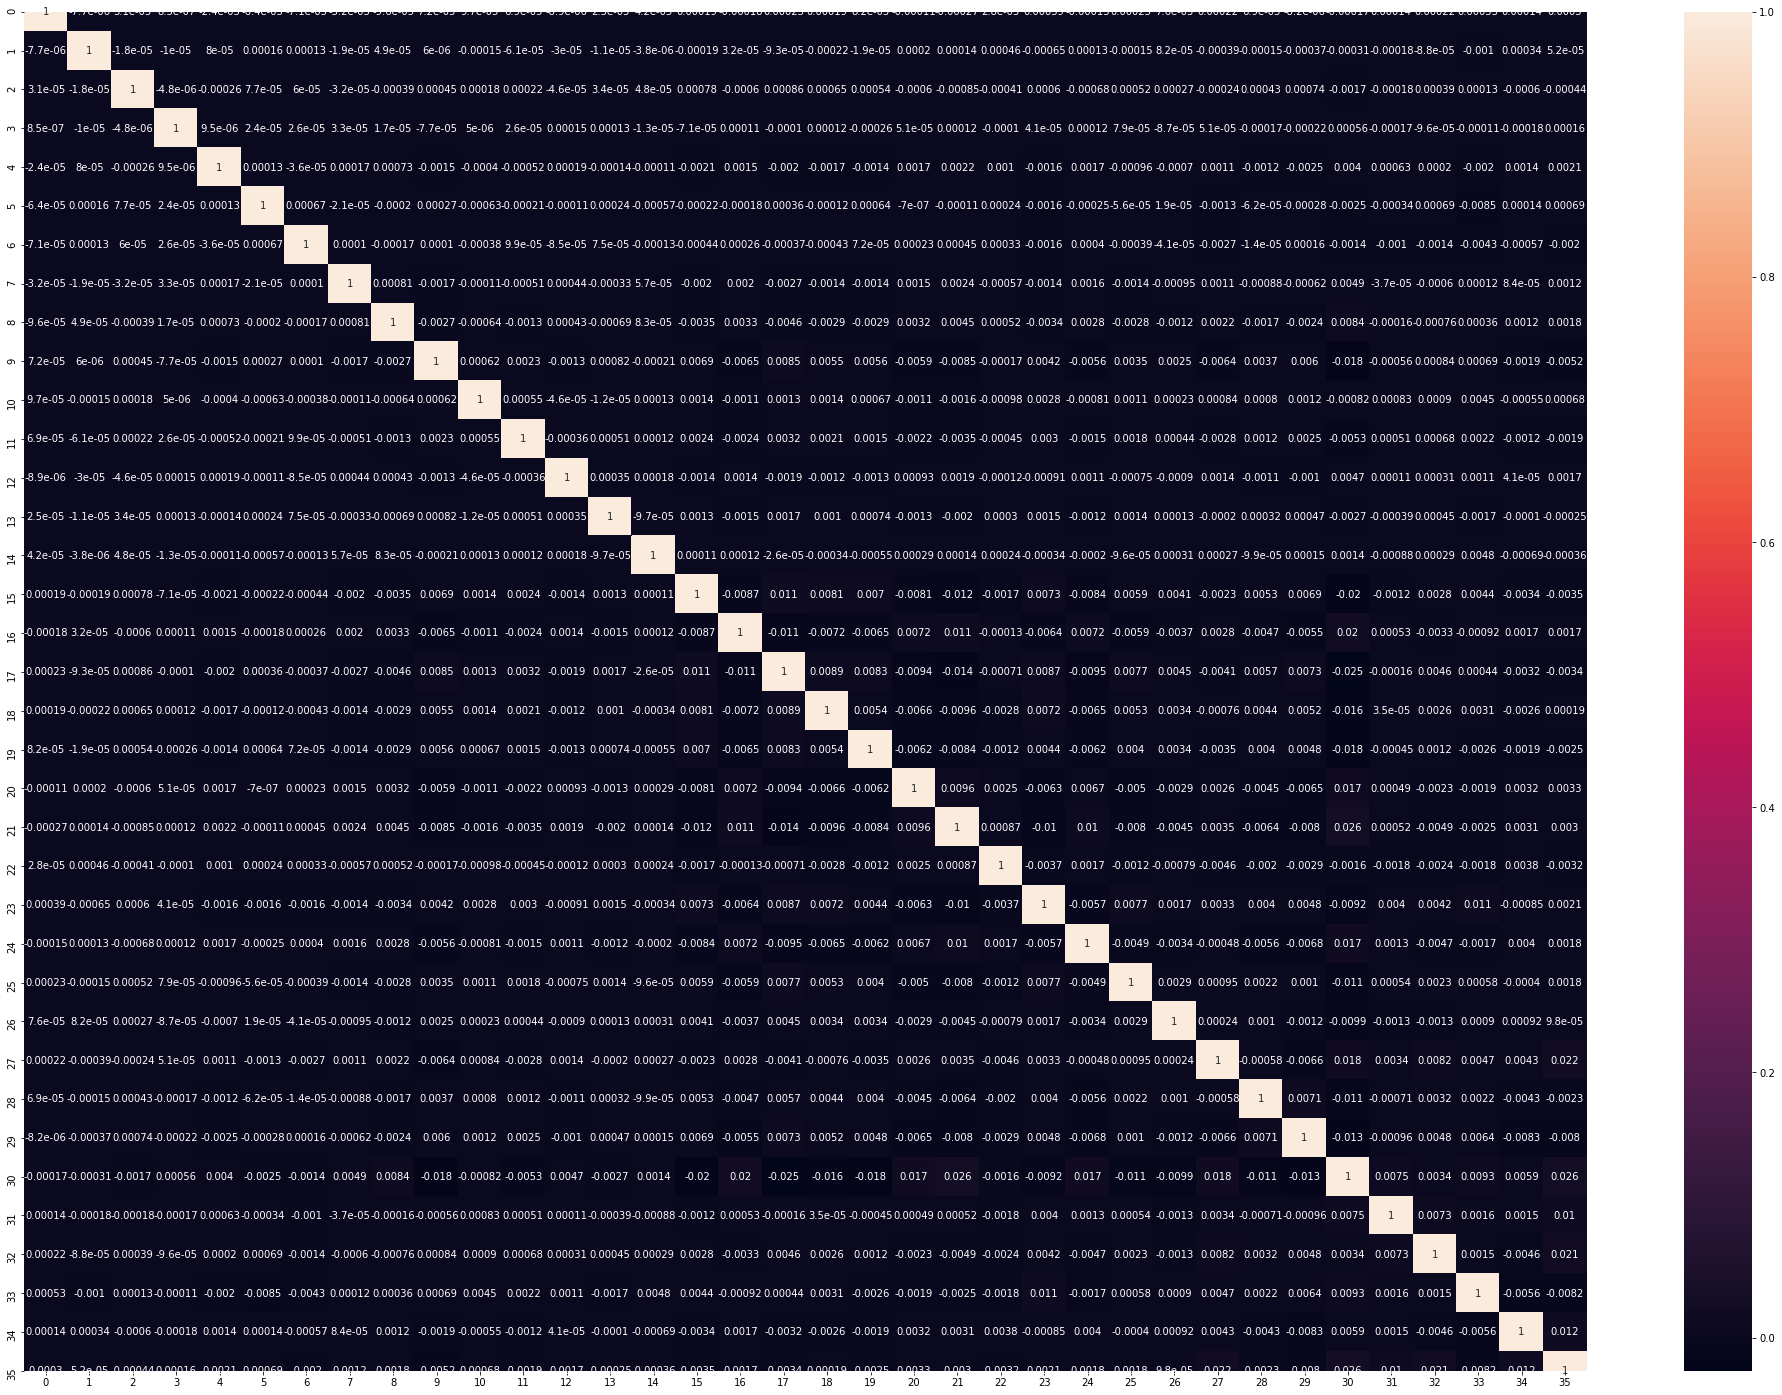

In [108]:
plt.figure(figsize=[35,25])
sns.heatmap(corrmat, annot=True)

In [109]:
df_test_pca = pca_final.transform(X_test)

In [110]:
col = list(X_train_bal.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(15)

,PC1,PC2,PC3,Feature
0,0.218606,0.131252,0.187659,arpu_8
1,0.102389,0.208039,-0.045812,onnet_mou_8
2,0.165430,0.166981,0.001634,offnet_mou_8
3,0.004538,0.018392,0.124699,roam_ic_mou_8
4,0.010464,0.048997,0.152362,roam_og_mou_8
5,0.141036,-0.001824,-0.092717,loc_og_t2t_mou_8
6,0.211816,-0.055792,-0.066048,loc_og_t2m_mou_8
7,0.109509,-0.068451,0.036869,loc_og_t2f_mou_8
8,0.028344,0.054706,-0.016405,loc_og_t2c_mou_8
9,0.228617,-0.040884,-0.097129,loc_og_mou_8


In [111]:
df_train_pca.shape, df_test_pca.shape

((38276, 36), (8959, 36))

## Logistic Regression with pca (reduced dataset)

In [112]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression

lr_pca = LogisticRegression()
lr_pca.fit(df_train_pca, y_train_bal)

y_pred_train= lr_pca.predict(df_train_pca)
y_pred_test = lr_pca.predict(df_test_pca)


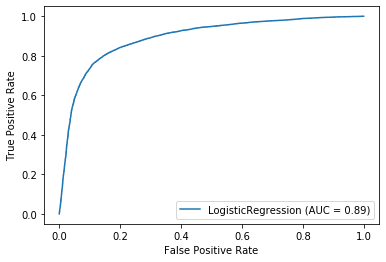

In [113]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr_pca,df_train_pca,y_train_bal,drop_intermediate=False)

In [114]:
print("*****************TRAIN SET***********************************")
get_metrics(y_train_bal, y_pred_train)
print("*****************TEST SET***********************************")
get_metrics(y_test, y_pred_test)

*****************TRAIN SET***********************************
Accuracy:  0.8226564949315498
F1 score:  0.8244815638413404
Recall:  0.8330546556588986
Precision:  0.8160831285831286

 clasification report:
               precision    recall  f1-score   support

         0.0       0.83      0.81      0.82     19138
         1.0       0.82      0.83      0.82     19138

    accuracy                           0.82     38276
   macro avg       0.82      0.82      0.82     38276
weighted avg       0.82      0.82      0.82     38276


 confussion matrix:
 [[15545  3593]
 [ 3195 15943]]
*****************TEST SET***********************************
Accuracy:  0.8153811809353723
F1 score:  0.42926155969634233
Recall:  0.8227513227513228
Precision:  0.2903828197945845

 clasification report:
               precision    recall  f1-score   support

         0.0       0.98      0.81      0.89      8203
         1.0       0.29      0.82      0.43       756

    accuracy                           0.82 

## Decision Tree with Default Parameters (With PCA)

In [115]:
decision_tree_pca = DecisionTreeClassifier(random_state=56, max_depth=3)
decision_tree_pca.fit(df_train_pca, y_train_bal)
y_pred_train = decision_tree_pca.predict(df_train_pca).astype(int)
y_pred_test = decision_tree_pca.predict(df_test_pca).astype(int)

In [116]:
print("*****************TRAIN SET***********************************")
get_metrics(y_train_bal, y_pred_train)
print("*****************TEST SET***********************************")
get_metrics(y_test, y_pred_test)

*****************TRAIN SET***********************************
Accuracy:  0.7810115999581984
F1 score:  0.7680942895086322
Recall:  0.7253108997805413
Precision:  0.8162413265906151

 clasification report:
               precision    recall  f1-score   support

         0.0       0.75      0.84      0.79     19138
         1.0       0.82      0.73      0.77     19138

    accuracy                           0.78     38276
   macro avg       0.78      0.78      0.78     38276
weighted avg       0.78      0.78      0.78     38276


 confussion matrix:
 [[16013  3125]
 [ 5257 13881]]
*****************TEST SET***********************************
Accuracy:  0.8277709565799755
F1 score:  0.4161937192584184
Recall:  0.7275132275132276
Precision:  0.29146793852676206

 clasification report:
               precision    recall  f1-score   support

         0.0       0.97      0.84      0.90      8203
         1.0       0.29      0.73      0.42       756

    accuracy                           0.83 

## Decision Tree with Hyperparameters (With PCA)

In [117]:
# Create the parameter grid based on the results of random search 
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [3,5,6,7],
    'min_samples_leaf': [10,12,13, 15,20,30,40,50],
    'criterion': ["gini", "entropy"]
}

In [118]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [119]:
%%time
grid_search.fit(df_train_pca, y_train_bal)

Fitting 4 folds for each of 64 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:  1.0min finished


Wall time: 1min 3s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 7],
                         'min_samples_leaf': [10, 12, 13, 15, 20, 30, 40, 50]},
             scoring='accuracy', verbose=1)

In [120]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, random_state=42)

In [121]:
dt_best = grid_search.best_estimator_

In [122]:
y_pred_train = dt_best.predict(df_train_pca).astype(int)
y_pred_test = dt_best.predict(df_test_pca).astype(int)

In [123]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_bal, y_pred_train))


0.8374960810952033


In [124]:
 print("*****************TRAIN SET***********************************")
get_metrics(y_train_bal, y_pred_train)
print("*****************TEST SET***********************************")
get_metrics(y_test, y_pred_test)

*****************TRAIN SET***********************************
Accuracy:  0.8374960810952032
F1 score:  0.8303698047343733
Recall:  0.7954854216741561
Precision:  0.8684540787221905

 clasification report:
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.84     19138
         1.0       0.87      0.80      0.83     19138

    accuracy                           0.84     38276
   macro avg       0.84      0.84      0.84     38276
weighted avg       0.84      0.84      0.84     38276


 confussion matrix:
 [[16832  2306]
 [ 3914 15224]]
*****************TEST SET***********************************
Accuracy:  0.85243888826878
F1 score:  0.4541701073492981
Recall:  0.7275132275132276
Precision:  0.33013205282112845

 clasification report:
               precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      8203
         1.0       0.33      0.73      0.45       756

    accuracy                           0.85   

## Random Forest with PCA (Default Parameters)

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf=RandomForestClassifier(n_estimators=10,max_depth=5,max_features=10,random_state=100,oob_score=True)

In [127]:
%%time
rf.fit(df_train_pca, y_train_bal.values.ravel())

Wall time: 1.69 s


RandomForestClassifier(max_depth=5, max_features=10, n_estimators=10,
                       oob_score=True, random_state=100)

In [128]:
rf.oob_score_

0.8029574668199394

In [129]:
y_pred_train = rf.predict(df_train_pca).astype(int)
y_pred_test = rf.predict(df_test_pca).astype(int)

In [130]:
print("*****************TRAIN SET***********************************")
get_metrics(y_train_bal, y_pred_train)
print("*****************TEST SET***********************************")
get_metrics(y_test, y_pred_test)

*****************TRAIN SET***********************************
Accuracy:  0.8214808234925279
F1 score:  0.8123266225383834
Recall:  0.7727035217891106
Precision:  0.8562329917202246

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.87      0.83     19138
         1.0       0.86      0.77      0.81     19138

    accuracy                           0.82     38276
   macro avg       0.82      0.82      0.82     38276
weighted avg       0.82      0.82      0.82     38276


 confussion matrix:
 [[16655  2483]
 [ 4350 14788]]
*****************TEST SET***********************************
Accuracy:  0.8595825426944972
F1 score:  0.46875
Recall:  0.7341269841269841
Precision:  0.3442928039702233

 clasification report:
               precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      8203
         1.0       0.34      0.73      0.47       756

    accuracy                           0.86      8959
  

## Random Forest with Hyperparamters

In [131]:
params= {'max_depth':[10,20,25,30],
        'min_samples_leaf':[50,100,200],
        'n_estimators':[10,25,50,100]}

In [132]:
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

In [133]:
grid_search.fit(df_train_pca, y_train_bal)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  7.4min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=5, max_features=10,
                                              n_estimators=10, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 25, 30],
                         'min_samples_leaf': [50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [134]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=50,
                       oob_score=True, random_state=100)

In [135]:
rf_best=grid_search.best_estimator_

In [136]:
y_pred_train = rf_best.predict(df_train_pca).astype(int)
y_pred_test = rf_best.predict(df_test_pca).astype(int)

In [137]:
print("*****************TRAIN SET(Random Forest using Hyperparameters)***********************************")
get_metrics(y_train_bal, y_pred_train)
print("*****************TEST SET(Random Forest using Hyperparameters)***********************************")
get_metrics(y_test, y_pred_test)

*****************TRAIN SET(Random Forest using Hyperparameters)***********************************
Accuracy:  0.887997700909186
F1 score:  0.886253283451405
Recall:  0.8726617201379454
Precision:  0.900274917794189

 clasification report:
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     19138
         1.0       0.90      0.87      0.89     19138

    accuracy                           0.89     38276
   macro avg       0.89      0.89      0.89     38276
weighted avg       0.89      0.89      0.89     38276


 confussion matrix:
 [[17288  1850]
 [ 2437 16701]]
*****************TEST SET(Random Forest using Hyperparameters)***********************************
Accuracy:  0.8830226587788815
F1 score:  0.5192660550458716
Recall:  0.7486772486772487
Precision:  0.39747191011235955

 clasification report:
               precision    recall  f1-score   support

         0.0       0.97      0.90      0.93      8203
         1.0       0.40     

## 7 . Recommendations:<a id="7"></a>

### `Model Insights`:

To analyse the behavior of a customer over a time period of good phase and the action phase we created about 4 predictive models as mentioned below:-

(1.) Descision Tree without PCA<br>
(2.) Logistic Regression with PCA<br>
(3.) Descision Tree with PCA (using default parameters and Hyperparameters)<br>
(4.) Random Forest with PCA (using default parameters and Hyperparameters)

All of the models mentioned above are built using default as well as Hypertuned parameters (Except Logistic Regression Model).

<table style="width:100%">
  <tr>
    <th>Model Type</th>
    <th>Accuracy(Train)</th>
    <th>Recall(Train)</th>
      <th>Accuracy(Test)</th>
    <th>Recall(Test)</th>
  </tr>
   <tr>
    <td>Decision Tree without PCA (default) </td>
    <td>0.88</td>
    <td>0.86</td>
    <td>0.89</td>
    <td>0.72</td>
  </tr>  
  <tr>
    <td>Decision Tree without PCA (Hyperparameter)</td>
    <td>0.91</td>
    <td>0.91</td>
    <td>0.88</td>
    <td>0.70</td>
  </tr>
  <tr>
    <td>Logistic Regression with PCA</td> 
    <td>0.82</td>
    <td>0.83</td>
    <td>0.82</td>
    <td>0.82</td>
  </tr>
    <tr>
    <td>Decision Tree with PCA (default) </td>
    <td>0.78</td>
    <td>0.73</td>
    <td>0.83</td>
    <td>0.73</td>
  </tr>   
   <tr>
    <td>Decision Tree with PCA (HyperParameter) </td>
    <td>0.84</td>
    <td>0.80</td>
    <td>0.85</td>
    <td>0.73</td>
  </tr>
   <tr>
    <td>Random Forest with PCA (Default)</td>
       <td>0.82</td> 
    <td>0.77</td>
    <td>0.86</td>
    <td>0.73</td>
    
  </tr>
   <tr>
    <td>Random Forest with PCA (HyperParameter)</td>
    <td>0.89</td> 
    <td>0.87</td>
    <td>0.88</td>
    <td>0.75</td>
  </tr>  
</table>


- Out of above models, Logistic Regression gave better results in terms of accuracy and recall metrics as compared to other models. Random Forest (with PCA) also gave satisfactory results.
- Model performance improved after hyperparameter tunning.
- Accuracy for all the models is greater than 80% and recall is also around or above 70%.

### `Business Insights`: 

- Very Less Amount of High Value customers are churning which is a good service indicator
- People with less than 50 months (approx 4 Yrs of Tenure) are more likely to Churn
- Total no.of calls (Outgoing, incoming, Roaming,ONNET etc) and avg revenue per customer are strong indicator of churn.
- Total recharge amount, last day of recharge amt, Max Recharge Amount could be a good Churn Indicator.

